# Plotting Summary
Welcome to plotting summary by Owen.<br>
This is a summary for plotting in python, using matplotlib and seaborn.<br>
This is in working progress.<br>
I may not have properly referenced all the sources, since I started building this summary from day 1 of my python studies, when I didn't know the meaning of reference. I'll add more reference as I work on this summary.



#Link to Seaborn tutorial with titanic data

https://gist.github.com/mwaskom/8224591

It also shows ways to set the palettes up, so the whole notebook has dedicated colors for each category.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from IPython.display import set_matplotlib_formats
mpl.rcParams['axes.unicode_minus'] = False
set_matplotlib_formats('retina')

import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

Version and other info for mpl and sns:

In [2]:
!pip show matplotlib seaborn

Name: matplotlib
Version: 3.2.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /usr/local/lib/python3.7/dist-packages
Requires: python-dateutil, cycler, kiwisolver, pyparsing, numpy
Required-by: yellowbrick, seaborn, scikit-image, pycocotools, plotnine, pandas-profiling, mlxtend, mizani, missingno, matplotlib-venn, keras-vis, imgaug, fbprophet, fastai, descartes, daft
---
Name: seaborn
Version: 0.11.1
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /usr/local/lib/python3.7/dist-packages
Requires: pandas, numpy, scipy, matplotlib
Required-by: missingno


# Korean Fonts
Initial font will break if Korean characters are used.

In [3]:
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

Python 3.7.10
설정 폰트 글꼴: ['sans-serif'], 설정 폰트 사이즈: 10.0


Download Korean Font and set as font family

In [4]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [5]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
plt.rc('font', size=10)

NanumGothic Eco


Rebuild the font_manager, and restart the kernel. mpl stores font data in a separate 

In [6]:
fm._rebuild()

# rcParameters
rc parameters are global parameters that define the mpl plt setup.<br>
There are four different ways to change rc parameter settings yet they do exactly the same thing as far as I know.<br>
```python
plt.rc('font', size=SMALL_SIZE)
plt.rcParams['text.color'] = COLOR_FONT
mpl.rcParams['axes.labelsize'] = 'large'
sns.set(rc={'figure.facecolor':'k'})
```

We can basically manage every visual aspect of plots no matter how we choose to change the rc parameter settings, so my preference is to make a uniform theme for the whole notebook via rcParams setting, and then handle minor adjustments on the individual plots.<br>

Since my ipynb editors and GitHub are on dark theme, I like my plots with dark background(facecolor in the plt world) and bright text to bring out the contrast.<br>
You'll see my basic settings in following cells.

# Font Setup
We can setup font size and font color for the plots.

Setting font color is usefull when using dark background.

## Font Size, Color, Style, Weight
* Font size: all the text artist in mpl will accept certain strings to set the font size as a relative value of `mpl.rcParams['font.size']` property which is set to 10 pt as the standard value.<br>acceptable string values for fontsize: xx-small, x-small, small, medium, large, x-large, xx-large, larger, or smaller
* Font Color: Text artist doesn't cover axis and tick (not sure why).<br>
List of named colors that can be used with string color name for MPL is located here: https://matplotlib.org/examples/color/named_colors.html
* Font Style: Takes 'Italic' and something else.
* Font Weight: Setting the boldness. Can take several different levels of boldness.


## Additional color related parameters

In [7]:
[key for key in mpl.rcParams.keys() if "color" in key]

['axes.edgecolor',
 'axes.facecolor',
 'axes.labelcolor',
 'axes.titlecolor',
 'boxplot.boxprops.color',
 'boxplot.capprops.color',
 'boxplot.flierprops.color',
 'boxplot.flierprops.markeredgecolor',
 'boxplot.flierprops.markerfacecolor',
 'boxplot.meanprops.color',
 'boxplot.meanprops.markeredgecolor',
 'boxplot.meanprops.markerfacecolor',
 'boxplot.medianprops.color',
 'boxplot.whiskerprops.color',
 'figure.edgecolor',
 'figure.facecolor',
 'grid.color',
 'hatch.color',
 'legend.edgecolor',
 'legend.facecolor',
 'lines.color',
 'lines.markeredgecolor',
 'lines.markerfacecolor',
 'mpl_toolkits.legacy_colorbar',
 'patch.edgecolor',
 'patch.facecolor',
 'patch.force_edgecolor',
 'pdf.inheritcolor',
 'savefig.edgecolor',
 'savefig.facecolor',
 'scatter.edgecolors',
 'text.color',
 'xtick.color',
 'ytick.color']

In [8]:
SMALL_SIZE = 12
MEDIUM_SIZE = 15
LARGE_SIZE = 18

plt.rc('font', size=SMALL_SIZE) # Default text sizes
plt.rc('axes', titlesize=SMALL_SIZE) # Axes title fontsize
plt.rc('axes', labelsize=MEDIUM_SIZE) # x and y labels' fontsize
plt.rc('xtick', labelsize=SMALL_SIZE) # x tick label size
plt.rc('ytick', labelsize=SMALL_SIZE) # y tick label size
plt.rc('legend', fontsize=SMALL_SIZE) # Legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE) # Figure title size

COLOR_FACECOLOR = "#454545"
COLOR_FONT = "white"
COLOR_PROPS = "white"

for key in ["axes.facecolor", "figure.facecolor", "legend.facecolor", "savefig.facecolor"]:
    plt.rcParams[key] = COLOR_FACECOLOR

plt.rcParams['text.color'] = COLOR_FONT
plt.rcParams['axes.titlecolor'] = COLOR_FONT
plt.rcParams['axes.labelcolor'] = COLOR_FONT
plt.rcParams['xtick.color'] = COLOR_FONT
plt.rcParams['ytick.color'] = COLOR_FONT
plt.rcParams['scatter.edgecolors'] = None


# ATM, these two props color settings won't work with sns.boxplot.
for key in plt.rcParams.keys():
    if "props.markerfacecolor" in key or "props.markeredgecolor" in key:
        plt.rcParams[key] = COLOR_PROPS

for key in ['boxplot.capprops.color',  'boxplot.meanprops.color', 'boxplot.medianprops.color', 'boxplot.whiskerprops.color', 'boxplot.flierprops.color']:
    plt.rcParams[key] = COLOR_PROPS

PROPS_BOXPLOT = {
    "flierprops" : dict(markerfacecolor=COLOR_PROPS),
    "whiskerprops" : dict(color=COLOR_PROPS),
    "capprops" : dict(color=COLOR_PROPS),
    "meanprops" : dict(color=COLOR_PROPS),
    "medianprops" : dict(color=COLOR_PROPS)
}

# plt.rcParams['legend.fontsize'] = "large"
# plt.rcParams["axes.labelsize"] = "large"

# for key in plt.rcParams.keys():
#     if "weight" in key:
#         plt.rcParams[key] = 'bold'

# sns.set_style('whitegrid') globally change sns style.style must be one of white, dark, whitegrid, darkgrid, ticks
# HOWEVER, sns.set_theme() takes in default args such as font and style, and change them to default setting.
# So sns.set_theme(), should be used before font setting.
# Otherwise, use with sns.axes_style()
# sns.set(rc={'figure.facecolor':'k'}) 

In [9]:
for key in ['boxplot.capprops.color',  'boxplot.meanprops.color', 'boxplot.medianprops.color', 'boxplot.whiskerprops.color', 'boxplot.flierprops.color']:
        print(plt.rcParams[key])

white
white
white
white
white


# sns.set_style(), sns.axes_style(), sns.set_theme()

sns.set_style() and sns.set_theme() globally change sns style and theme.<br>
###**Note that sns.set_theme() takes in default args such as font and style, and will change them to default setting.**
So sns.set_theme(), should be used before font setting.<br>
For temporary style changes, use 

```python
with sns.axes_style(style="wanted style"):
    # plotting stuff here
```

# Data for the summary
Data we'll use for this plot summary is Korea Public Health Insurance Company Medcheck data of 2019.<br>You can find the data [here](https://www.data.go.kr/tcs/dss/selectDataSetList.do).(you'll need to search it though...)

In [10]:
file_name = '국민건강보험공단_건강검진정보_20191231.csv'
data = pd.read_csv(file_name, encoding='cp949')

# Original data has 1000000 entries and we don't need that much. let's reduce it to 10000
data = data.sample(10000,random_state=111)
print(data.info())
print(data.describe().T)
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 264980 to 263628
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   기준년도           10000 non-null  int64  
 1   가입자 일련번호       10000 non-null  int64  
 2   시도코드           10000 non-null  int64  
 3   성별코드           10000 non-null  int64  
 4   연령대 코드(5세단위)   10000 non-null  int64  
 5   신장(5Cm단위)      10000 non-null  int64  
 6   체중(5Kg 단위)     10000 non-null  int64  
 7   허리둘레           9995 non-null   float64
 8   시력(좌)          9999 non-null   float64
 9   시력(우)          9999 non-null   float64
 10  청력(좌)          9998 non-null   float64
 11  청력(우)          9998 non-null   float64
 12  수축기 혈압         9938 non-null   float64
 13  이완기 혈압         9938 non-null   float64
 14  식전혈당(공복혈당)     9936 non-null   float64
 15  총 콜레스테롤        3340 non-null   float64
 16  트리글리세라이드       3340 non-null   float64
 17  HDL 콜레스테롤      3340 non-null   float64
 18  

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자
264980,2019,264981,41,1,11,170,75,89.0,1.5,1.2,1.0,1.0,129.0,85.0,97.0,NaN,NaN,NaN,NaN,15.9,2.0,0.9,22.0,19.0,41.0,2.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
802028,2019,802029,47,1,7,165,75,89.0,1.2,1.2,1.0,1.0,110.0,70.0,101.0,NaN,NaN,NaN,NaN,15.8,1.0,1.2,54.0,82.0,80.0,1.0,1.0,1,0.0,미시행,미시행,미시행,0.0,20191231
932188,2019,932189,11,2,11,150,65,91.0,1.2,1.0,1.0,1.0,116.0,75.0,210.0,NaN,NaN,NaN,NaN,14.1,1.0,0.6,24.0,26.0,63.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
420208,2019,420209,41,1,10,160,60,79.0,1.2,1.2,1.0,1.0,130.0,80.0,102.0,NaN,NaN,NaN,NaN,13.5,1.0,1.0,17.0,15.0,26.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
739272,2019,739273,11,2,12,160,65,87.0,0.5,0.8,1.0,1.0,131.0,85.0,145.0,NaN,NaN,NaN,NaN,13.5,1.0,0.8,28.0,31.0,51.0,1.0,1.0,1,1.0,미시행,미시행,미시행,1.0,20191231


In [11]:
data = data.loc[data['허리둘레']<500]
data['흡연상태'].fillna(0.0, inplace=True)

# Palette Setup

In [12]:
# Sets specific colorcode to each category
pal_sex = {1:"#4682B4", 2:"#CD5C5C"} # Used for 성별코드

# sns.countplot

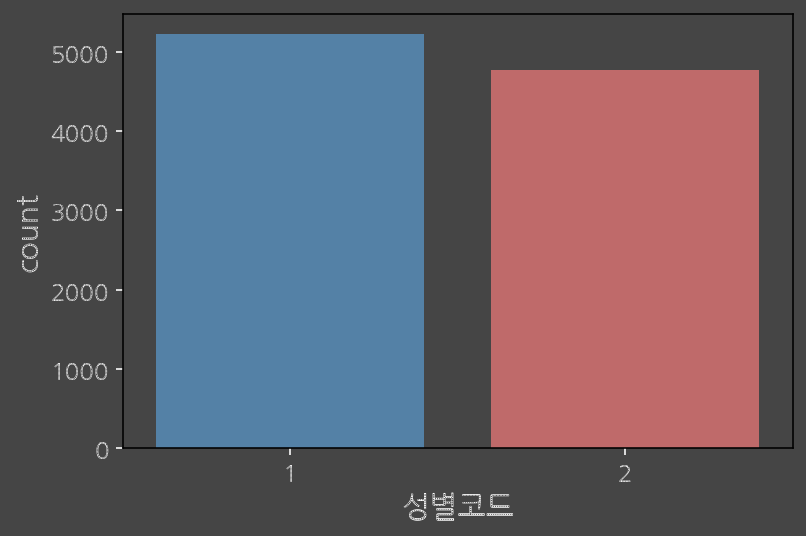

In [13]:
sns.countplot(data=data, x='성별코드', palette=pal_sex,)
plt.show()

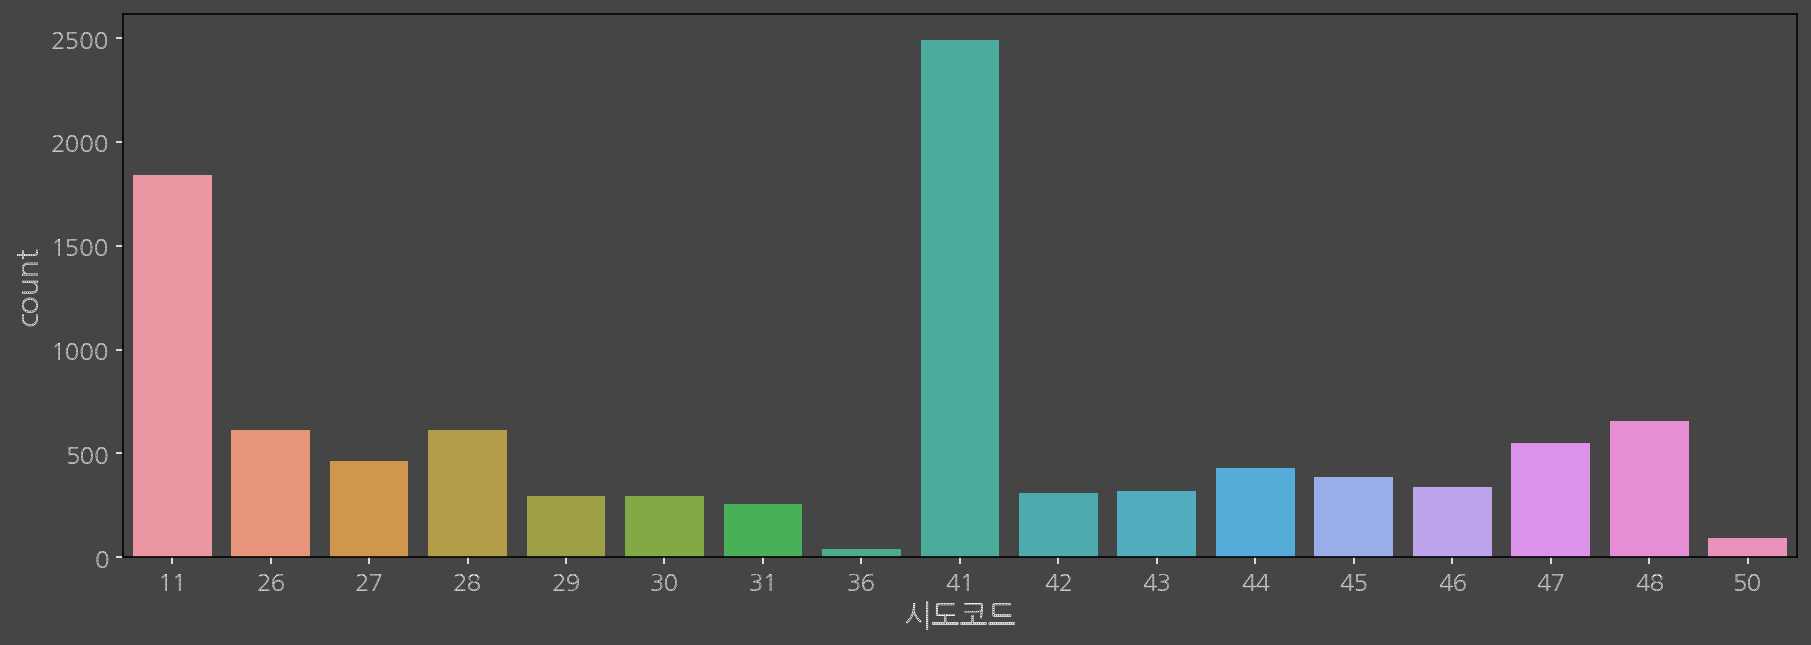

In [14]:
plt.figure(figsize=(15, 5))
sns.countplot(data=data, x='시도코드')

# Multiple subplots in a figure

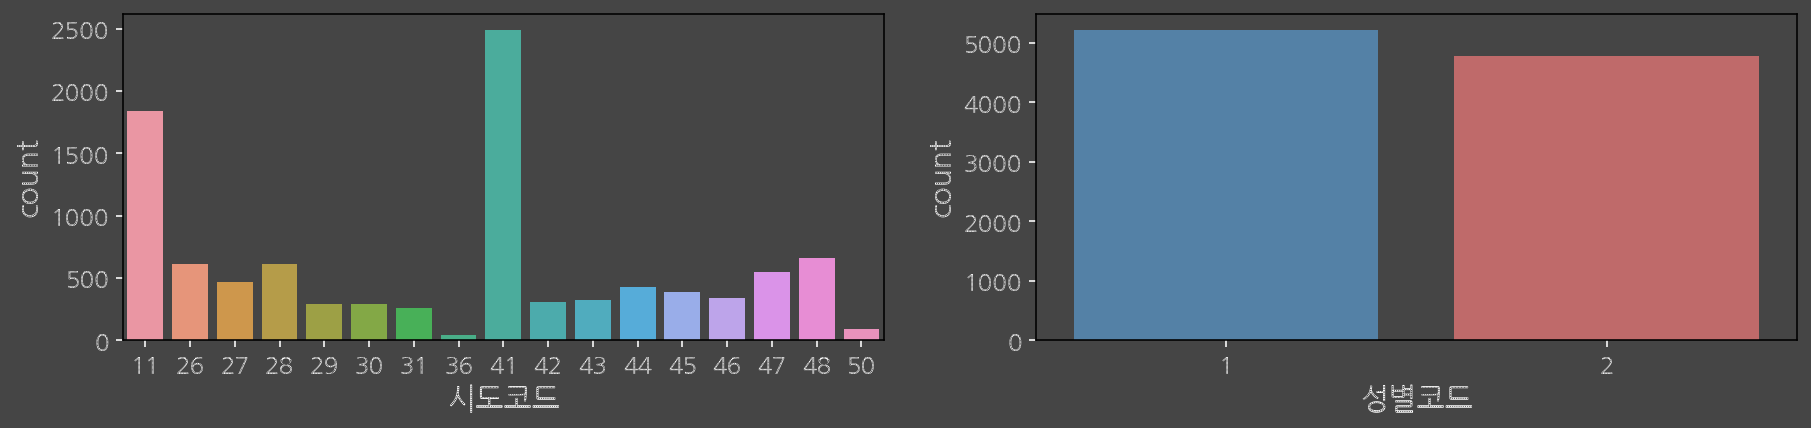

In [15]:
#Multiple subplots in a figure
figure,((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(15,3)
sns.countplot(data=data, x='시도코드', ax=ax1)
sns.countplot(data=data, x='성별코드', ax=ax2, palette=pal_sex)

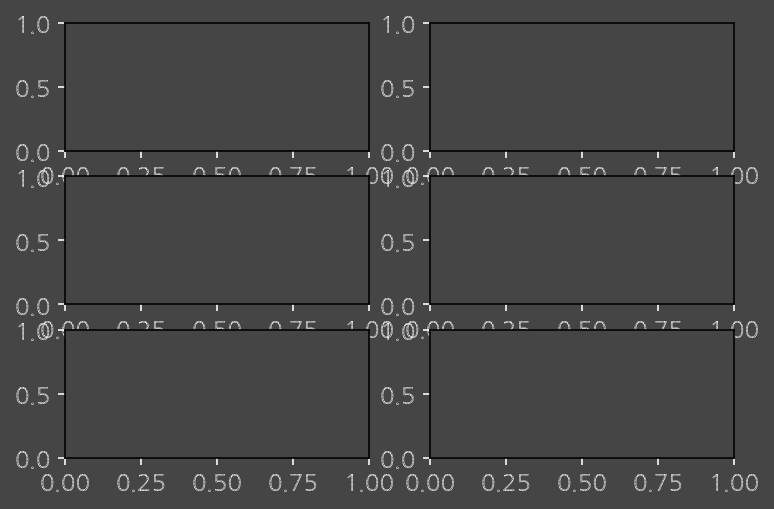

In [16]:
#Subplots unpacked into axes
figure,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2)

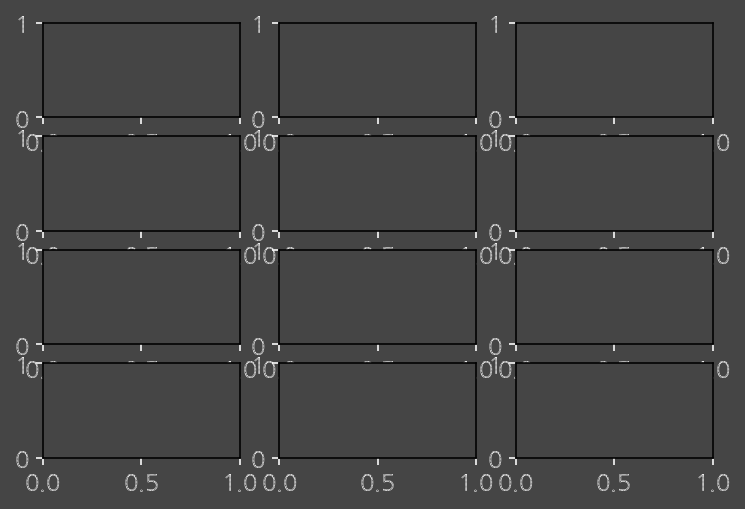

In [17]:
#Set of axes can be made
figure, axes = plt.subplots(nrows=4, ncols=3)

# Palette management
Seaborn plots have presets of colors as palette variable.

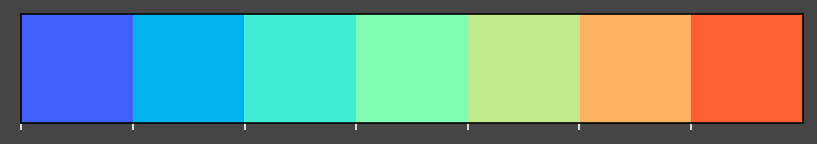

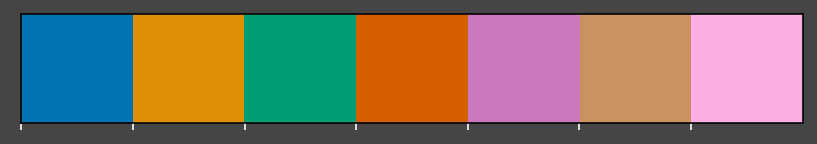

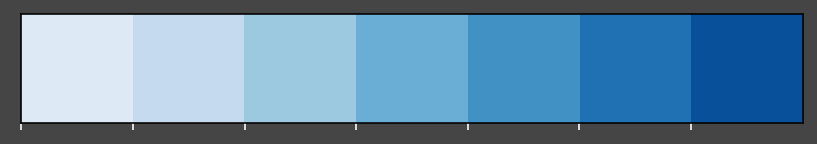

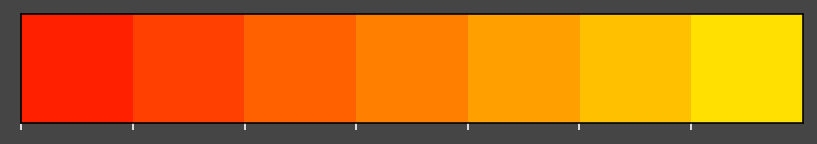

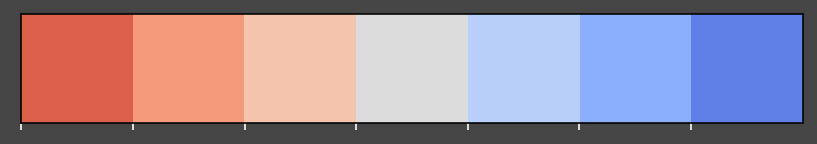

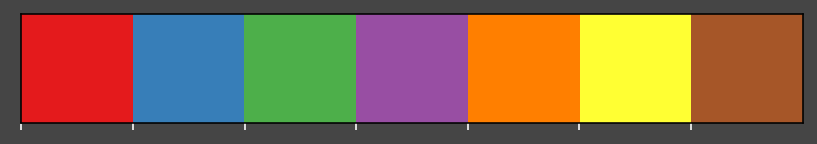

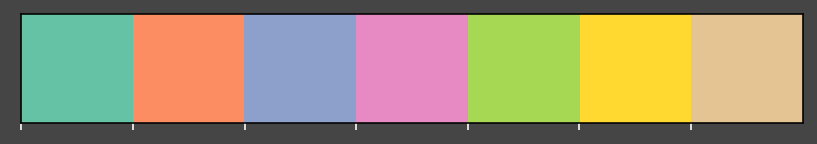

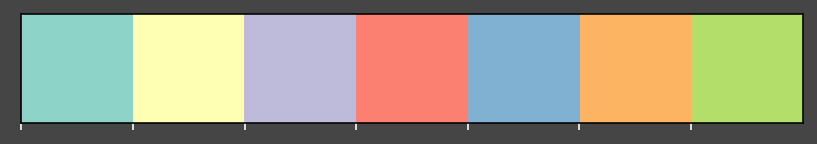

In [18]:
#color.adobe.com
pal_names = ['rainbow', 'colorblind', 'Blues', 'autumn', 'coolwarm_r', 'Set1', 'Set2', 'Set3']
for i in pal_names:
  palette = sns.color_palette(i, 7)
  sns.palplot(palette)

# Setting differents sizes for subplots

Notice that hue will separate the values according to the category


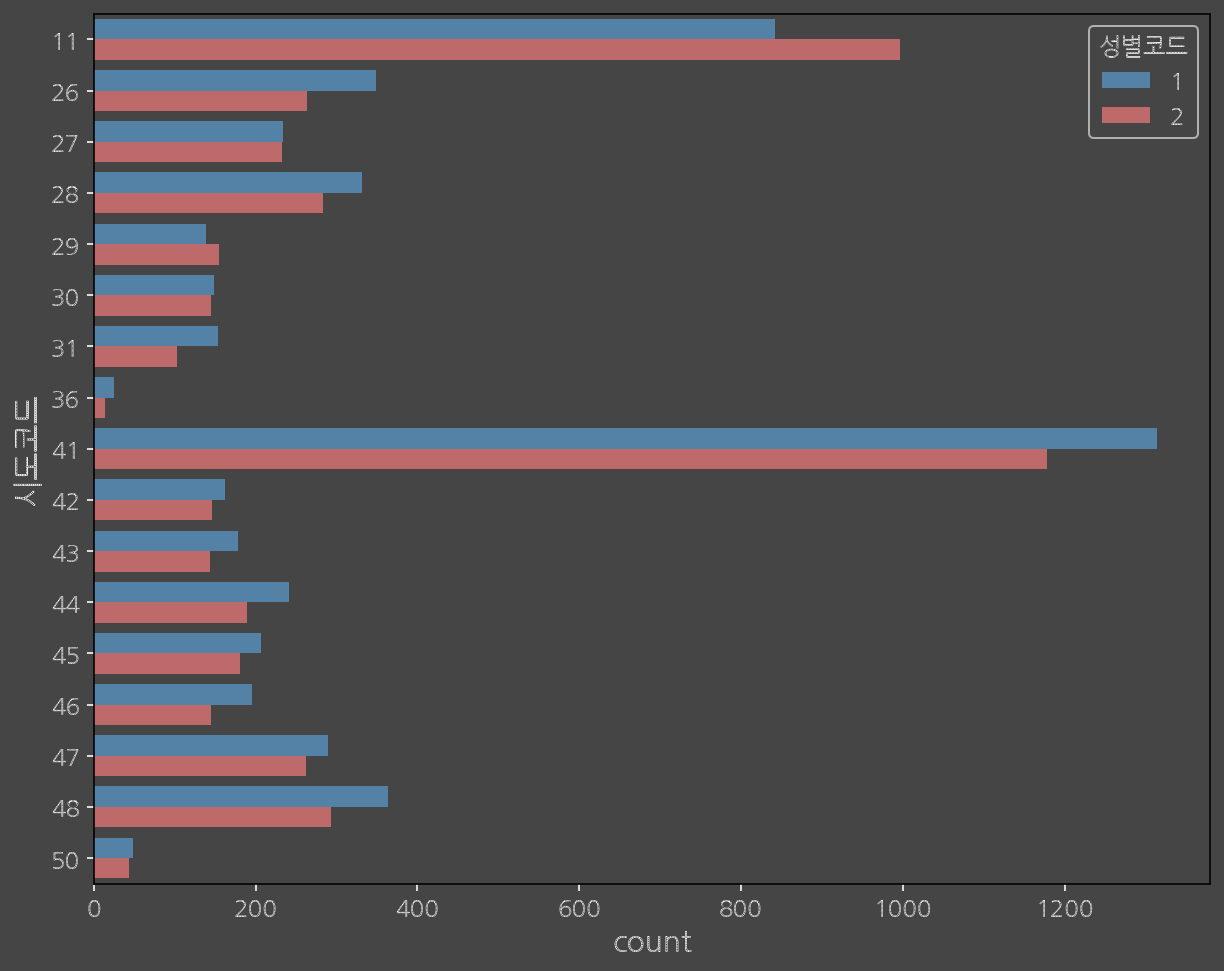

In [19]:
fig = plt.figure(figsize=(10,8))
sns.countplot(data=data, y='시도코드', hue='성별코드', palette=pal_sex)
plt.show()

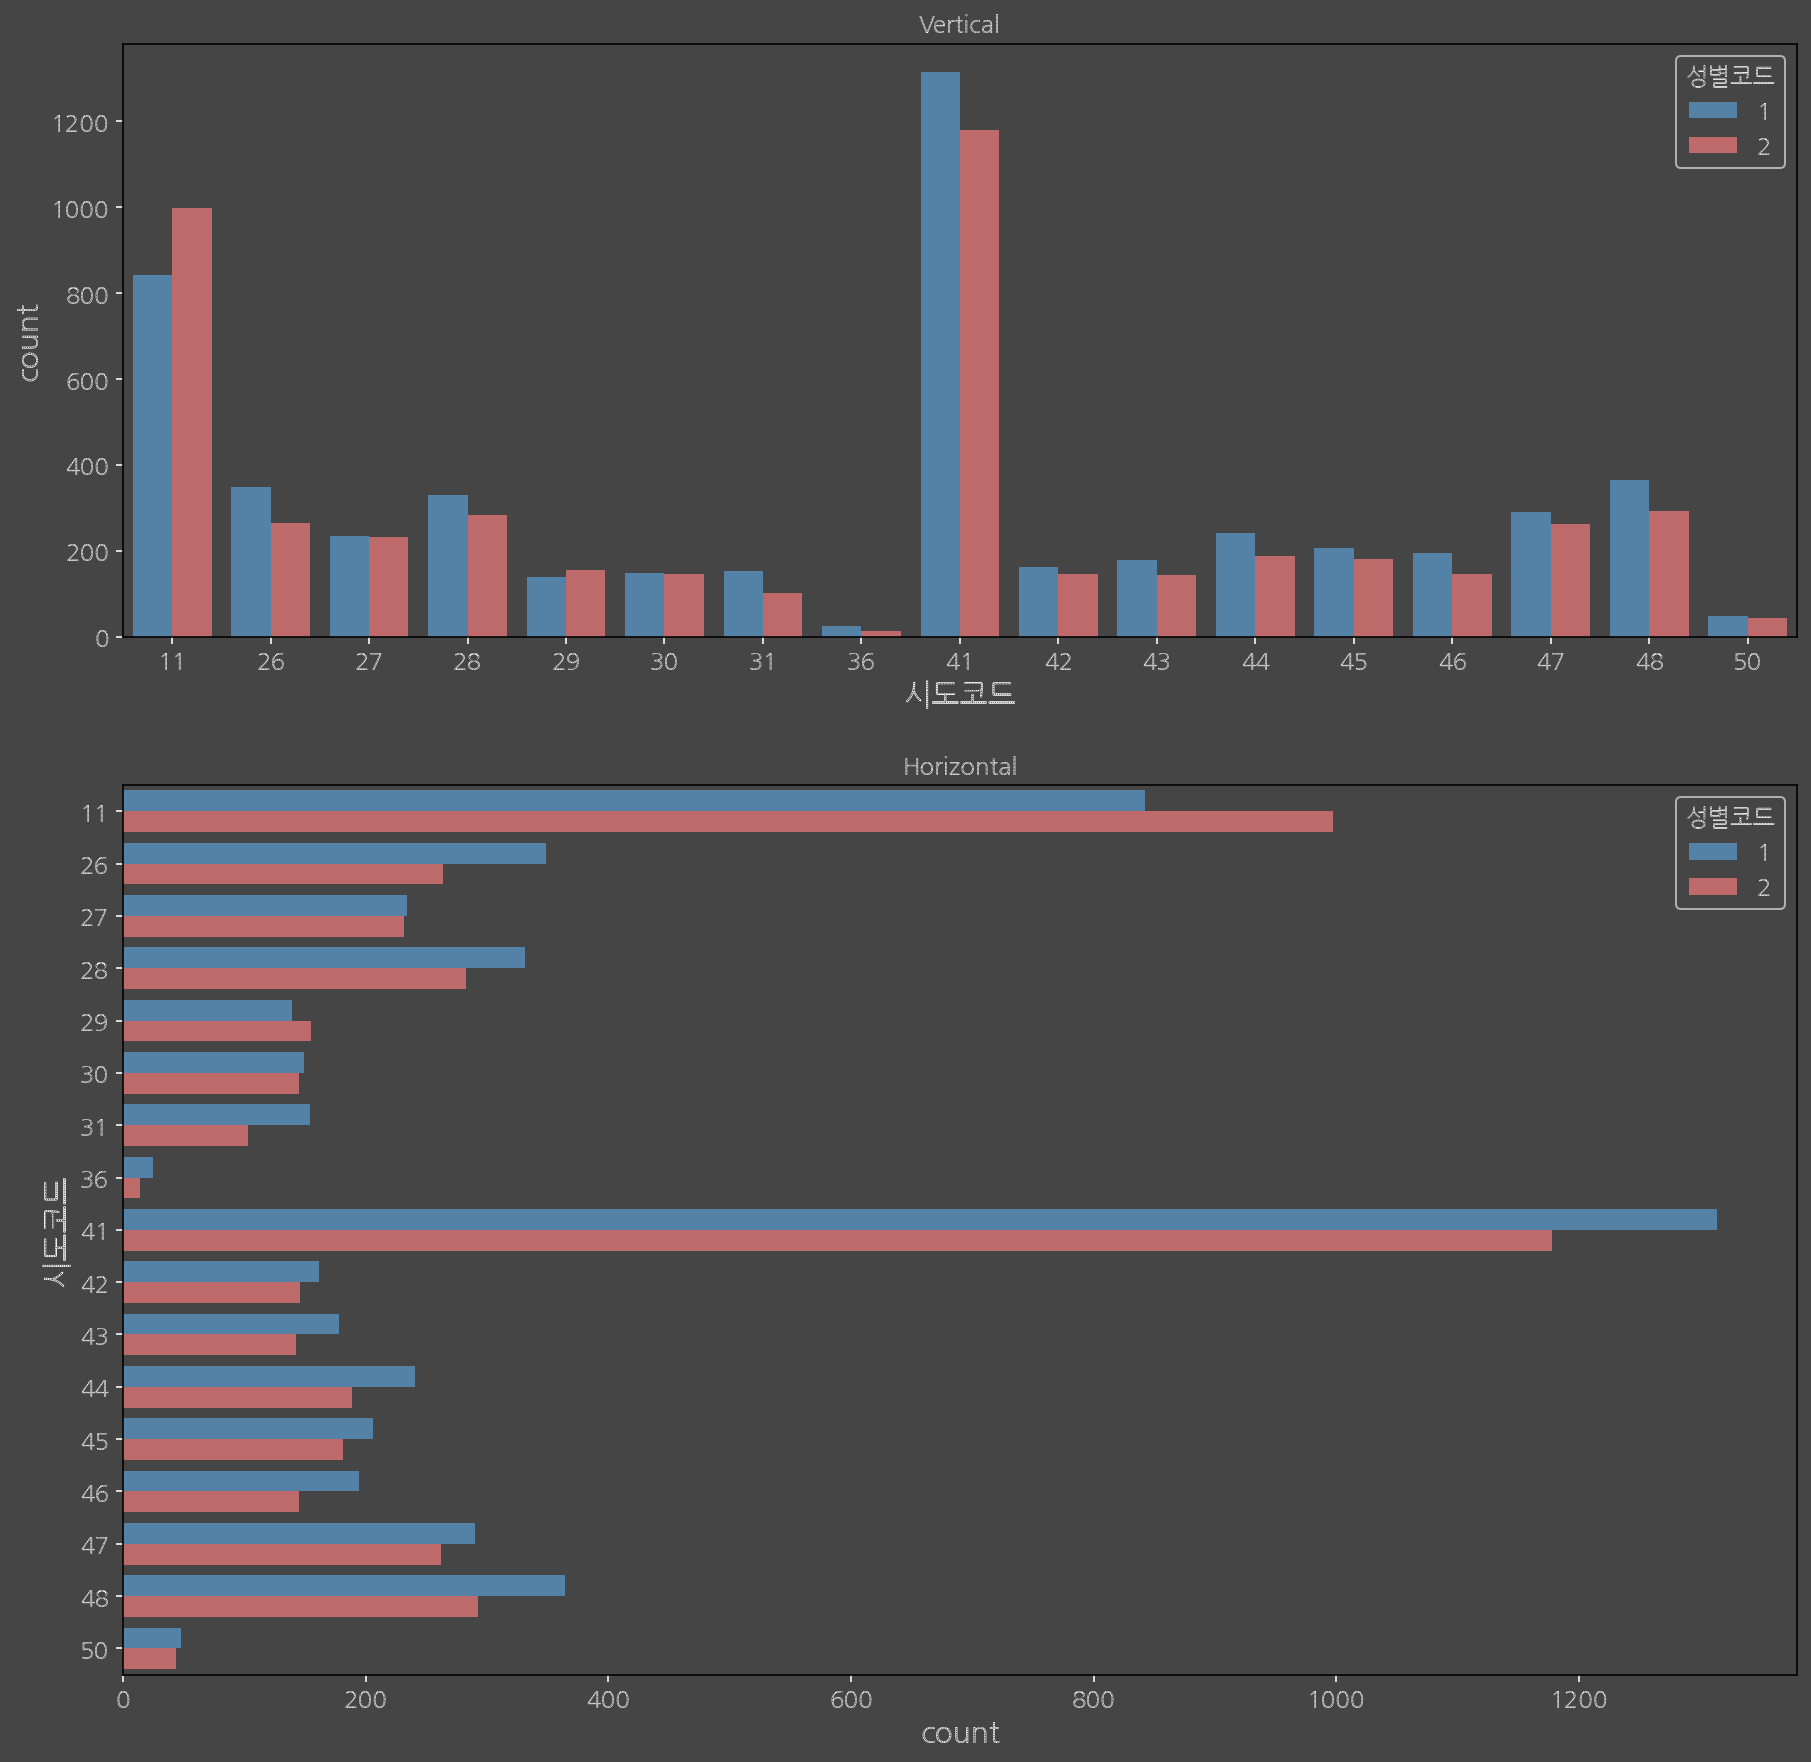

In [20]:
from matplotlib import gridspec

# Set the whole figure size
figure = plt.figure(figsize=(15,15))

# Set the subplot numbers, height_ratios, and width_ratios
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[2,3], width_ratios=[1])

# Assign gridspec to the appropriate subplot
ax0=plt.subplot(gs[0])
ax1=plt.subplot(gs[1])

# Use the subplot as the variable for ax
sns.countplot(data=data, x='시도코드', hue='성별코드', ax=ax0, palette=pal_sex)
sns.countplot(data=data, y='시도코드', hue='성별코드', ax=ax1, palette=pal_sex)

# Output
# Additionally, if use plt.savefig('directory/filename.svg'), the figure will be saved.
ax0.set_title('Vertical')
ax1.set_title('Horizontal')
plt.show()

# sns.histplot & sns.kdeplot

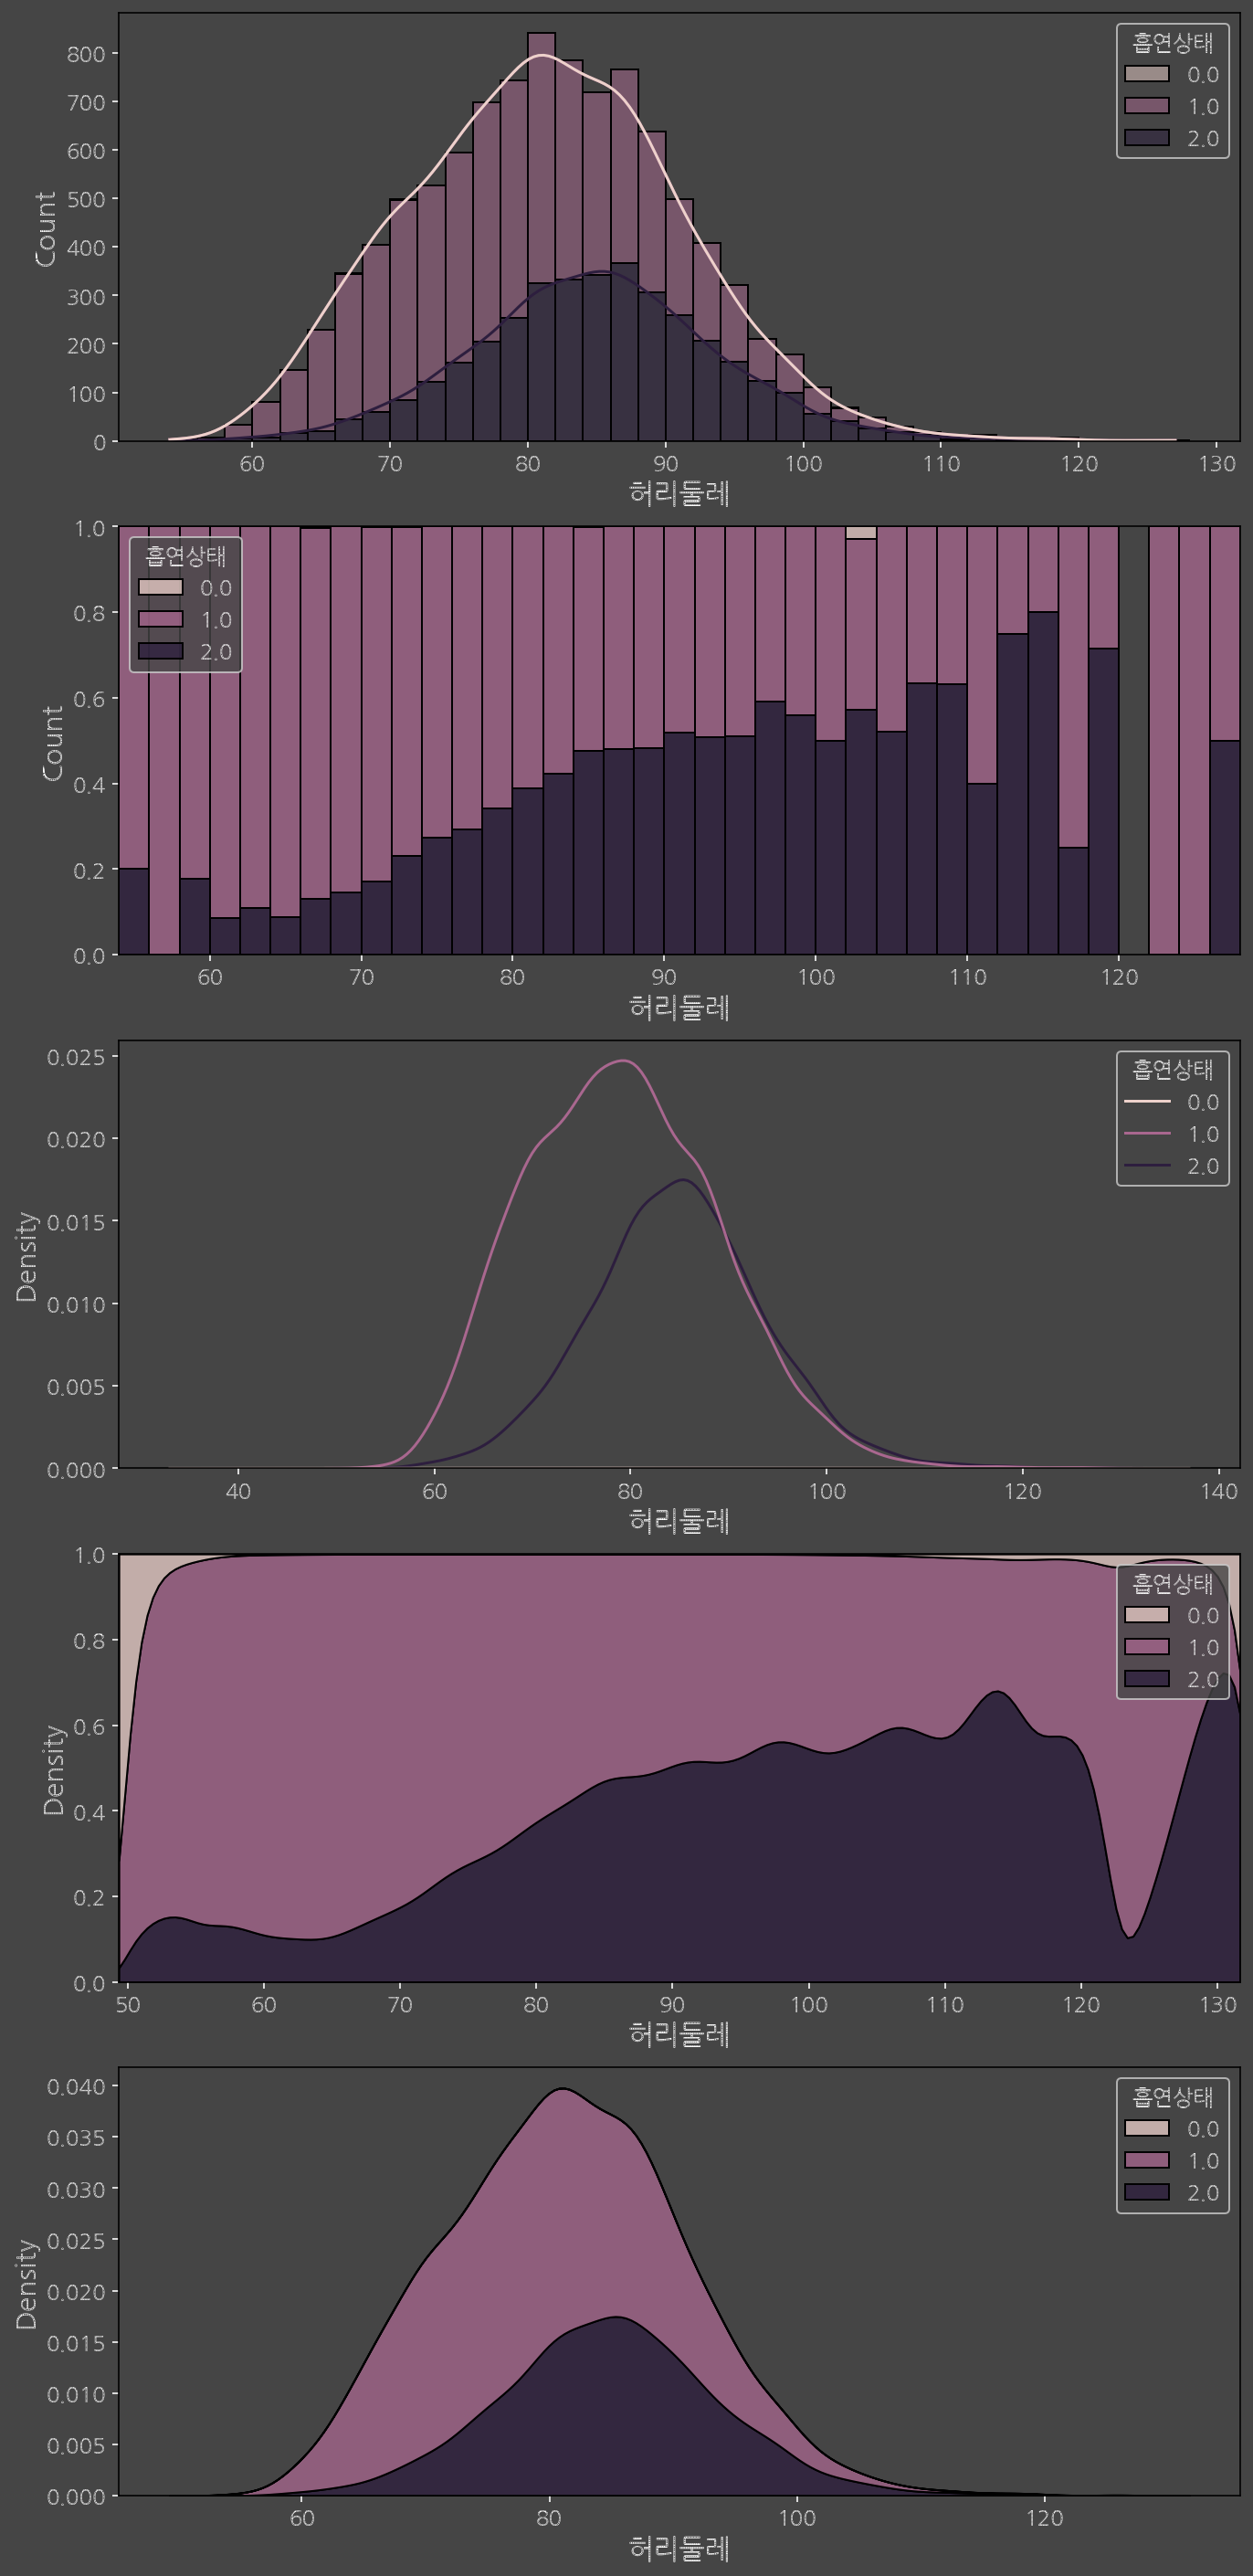

In [21]:
fig, axes = plt.subplots(nrows=5, ncols=1)
fig.set_size_inches(11,25)
hue_order = {0.0: '응답X', 1.0: '비흡연자', 2.0: "흡연자"}
sns.histplot(data, x='허리둘레', hue='흡연상태', multiple='stack', kde=True, binwidth=2, ax=axes[0], hue_order=hue_order, legend=hue_order) # kde seems to be off
sns.histplot(data, x='허리둘레', hue='흡연상태', multiple='fill', binwidth=2, ax=axes[1], hue_order=hue_order, legend=hue_order)
sns.kdeplot(data=data, x='허리둘레', hue='흡연상태', ax=axes[2], hue_order=hue_order, legend=hue_order)
sns.kdeplot(data=data, x='허리둘레', hue='흡연상태', multiple='fill', ax=axes[3], hue_order=hue_order, legend=hue_order)
sns.kdeplot(data=data, x='허리둘레', hue='흡연상태', multiple='stack', ax=axes[4], hue_order=hue_order, legend=hue_order)
plt.show()

Multiple plots without subplot assignment will overlay all the subplots into one plot.

Labels will automatically show if the plt.legend() is called and the title of the legend is assignable.

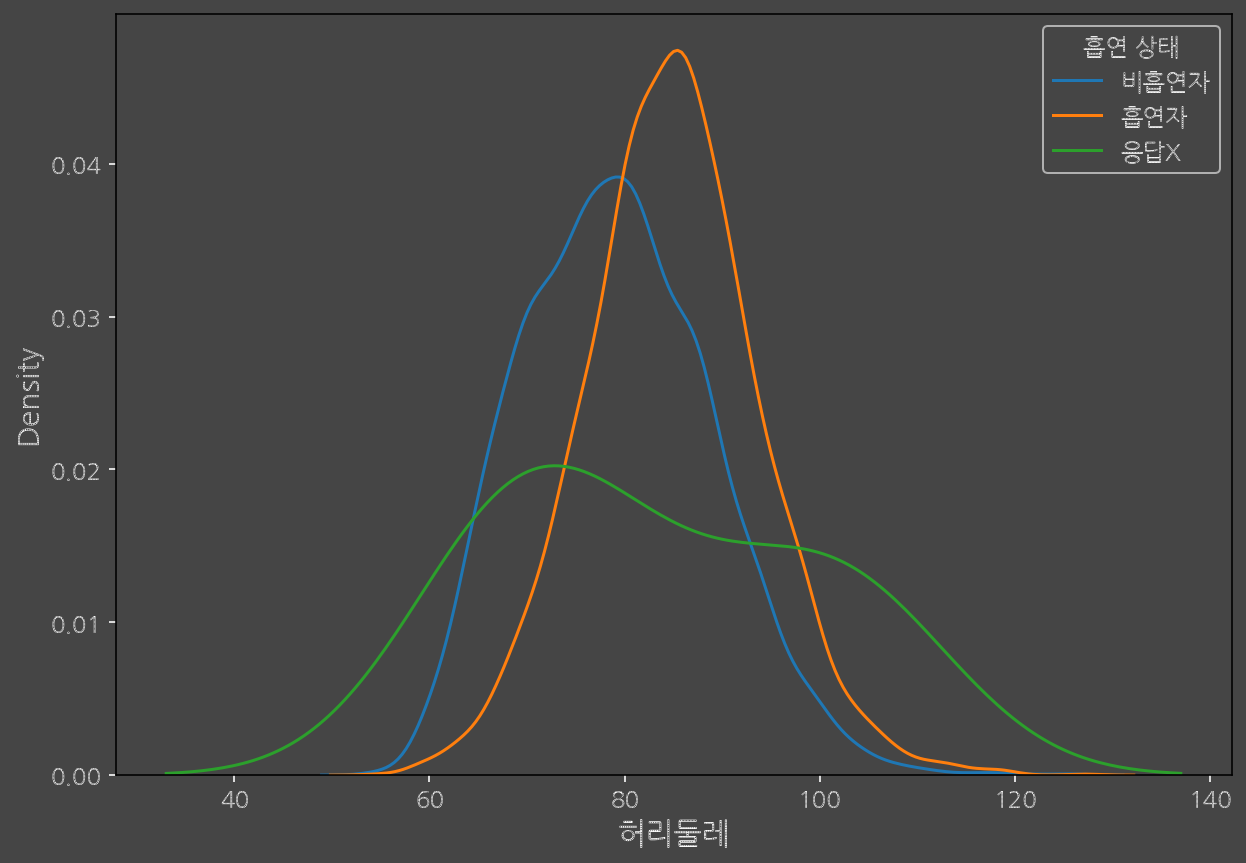

In [22]:
one = data[data['흡연상태']==1]
two = data[data['흡연상태']==2]
three = data[data['흡연상태']==0]

plt.figure(figsize=(10,7))

dist_one = sns.kdeplot(one['허리둘레'], label='비흡연자')
dist_two = sns.kdeplot(two['허리둘레'], label='흡연자')
dist_three = sns.kdeplot(three['허리둘레'], label='응답X')

plt.legend(title='흡연 상태')
plt.show()

# sns.barplot
sns.barplot(data=, x=, y=something_w/_numerical_values)

Default estimator is mean

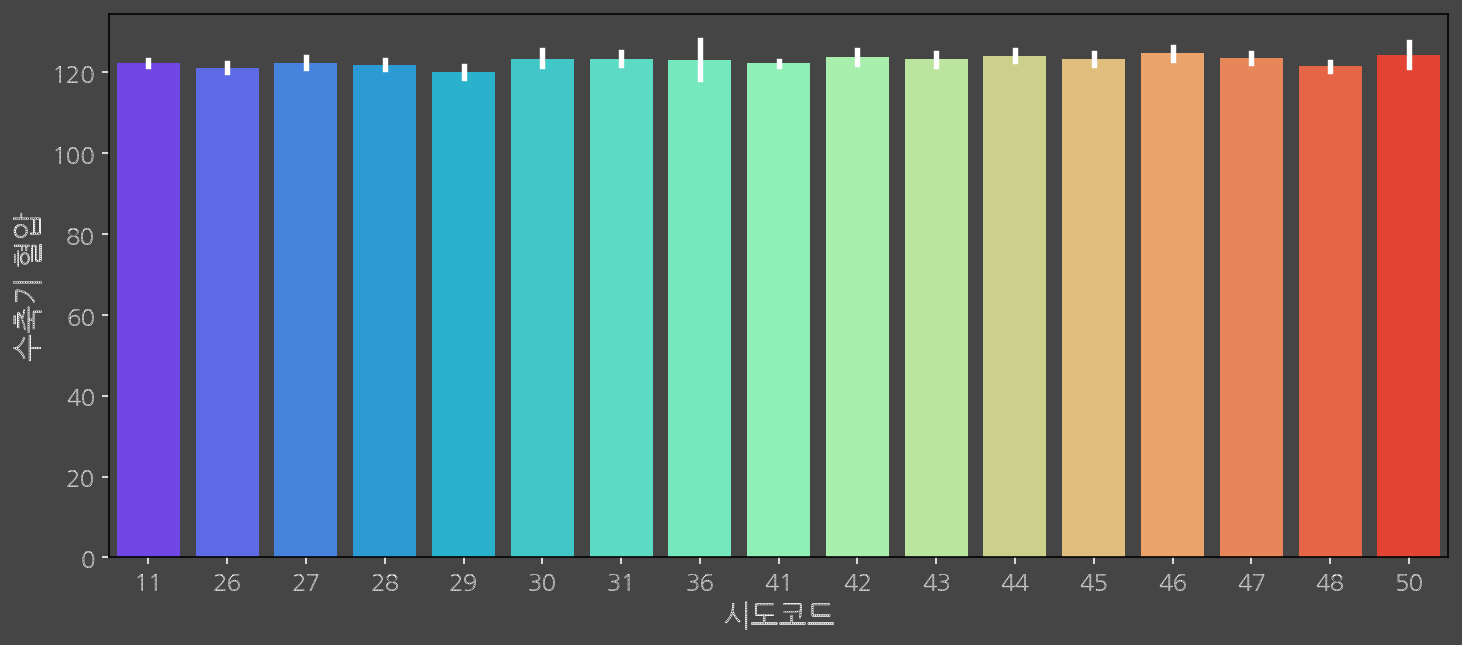

In [23]:
# sns barplot extends matplotlib.axes.Axes.bar and the errobar is under the ERRORBAR PLOTS
# Only ERRORBAR PLOTS rc Parameter at the moment is errorbar.capsize.
# So everytime we use barplot in a dark theme, errcolor = "white" should be passed in.
fig = plt.figure(figsize=(12,5))
sns.barplot(data=data, x='시도코드', y='수축기 혈압', color='b', palette='rainbow', errcolor="white")
# color is overridden if palette is used.
plt.show()

## Change the estimator to draw out other statistical values

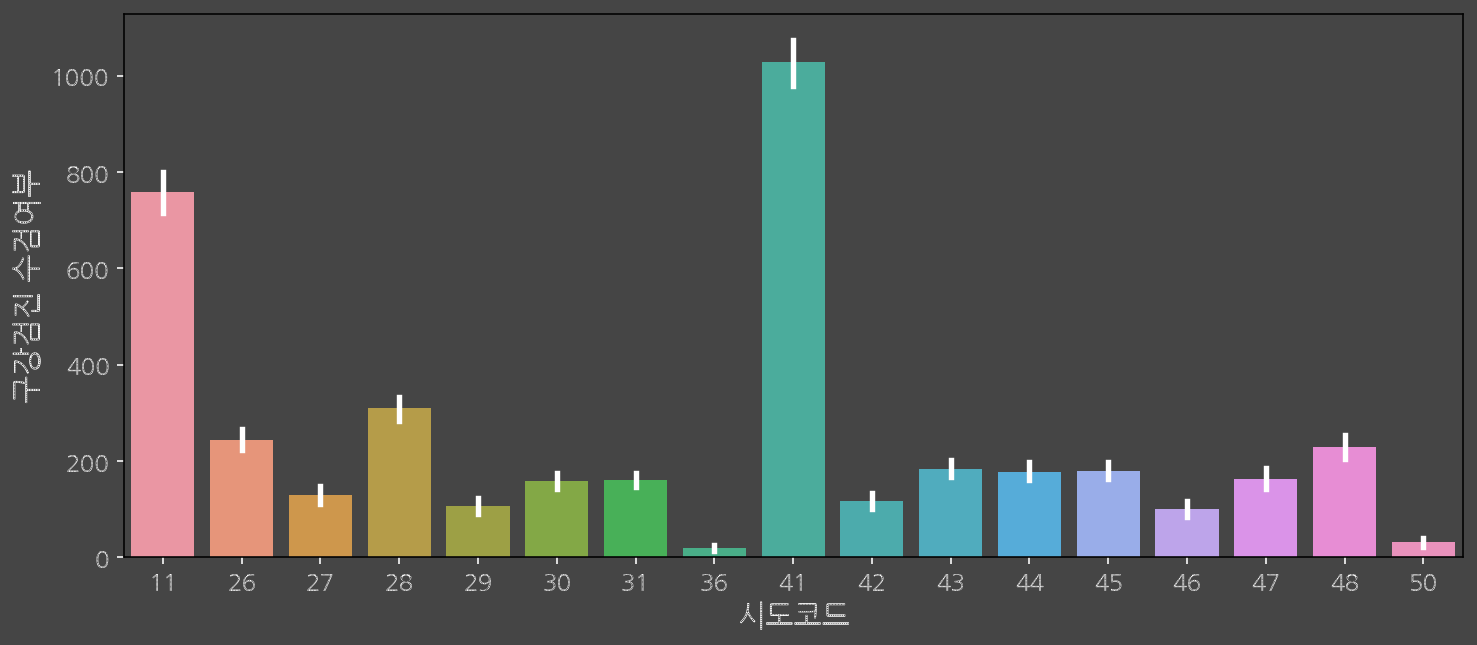

In [24]:

fig = plt.figure(figsize=(12,5))
sns.barplot(data=data, x='시도코드', y='구강검진 수검여부', estimator=np.sum, errcolor="white")
plt.show()

## Change orientation of the plot by swapping x,y and set orient

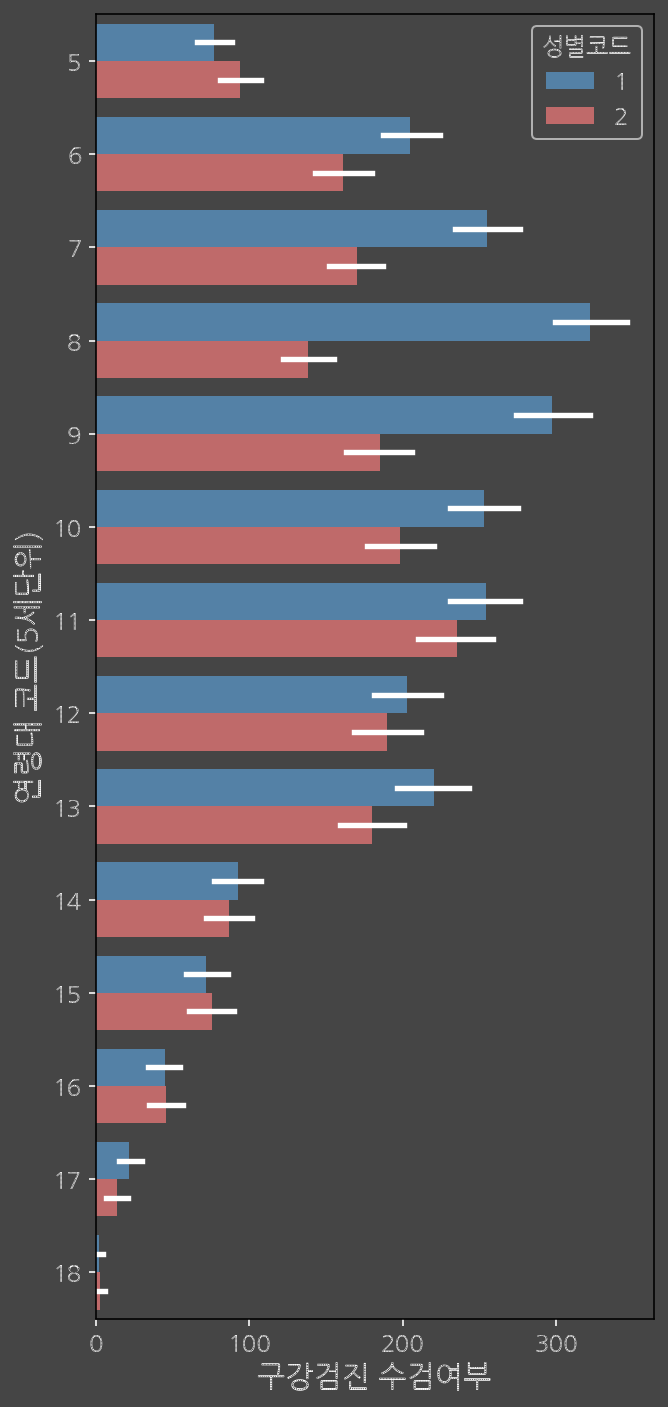

In [25]:
fig = plt.figure(figsize=(5,12))
sns.barplot(data=data, x='구강검진 수검여부', y='연령대 코드(5세단위)', hue='성별코드', estimator=np.sum, orient='h', palette=pal_sex, alpha=1, errcolor='white')
plt.show()


# sns.boxplot
Center of the box is 50 percentile(median).<br>
Box surrounds 25~75 percentile.<br>
Top tick and bottom tick shows 95% confidence interval.<br>
Points outside the boxplot shows outliers.

---------------------------------
rcParameters regarding boxplot whiskers, fliers and other data range related prop parameters don't work ATM.<br>
I'm using **kwargs PROPS_BOXPLOT defined earlier to make them uniform.

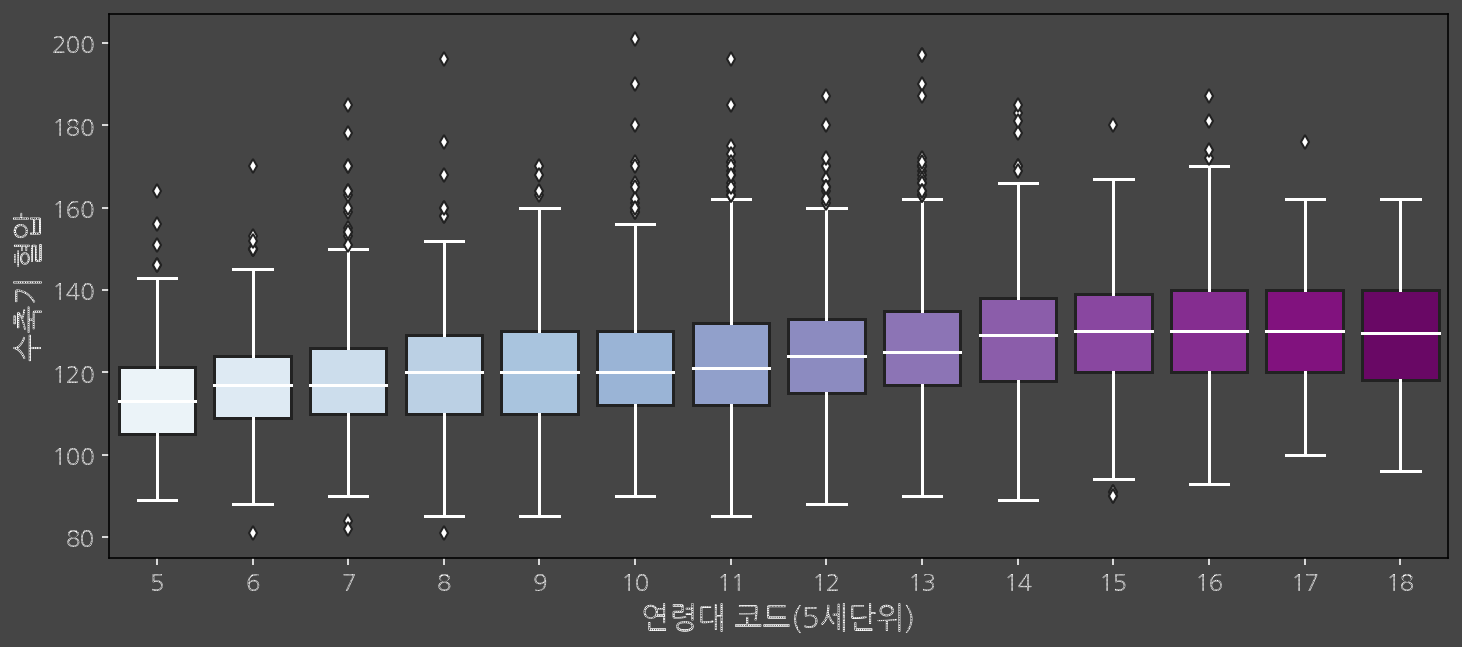

In [26]:
fig = plt.figure(figsize=(12,5))
sns.boxplot(data=data, x='연령대 코드(5세단위)', y='수축기 혈압', palette='BuPu', saturation=1, **PROPS_BOXPLOT)
plt.show()

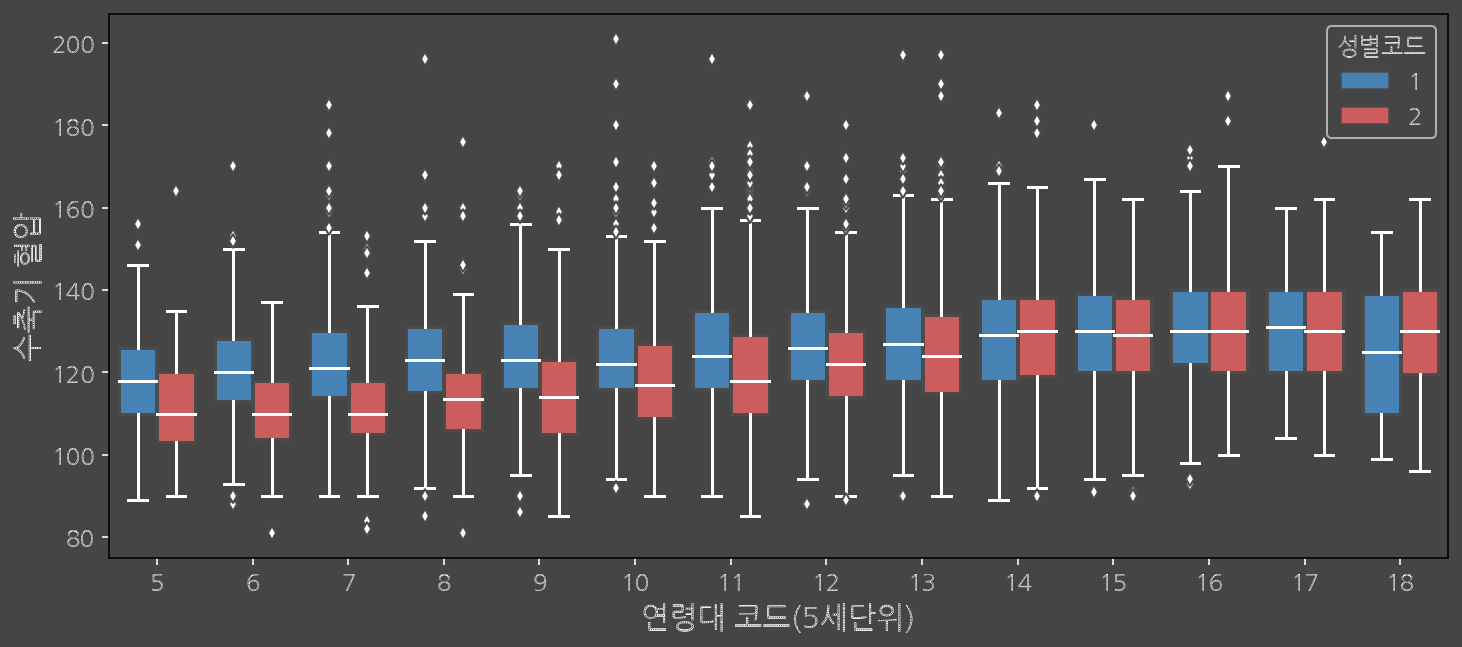

In [27]:
fig = plt.figure(figsize=(12,5))
sns.boxplot(data=data, x='연령대 코드(5세단위)', y='수축기 혈압', palette=pal_sex, hue='성별코드', saturation=1, **PROPS_BOXPLOT)
plt.show()

# sns.violinplot

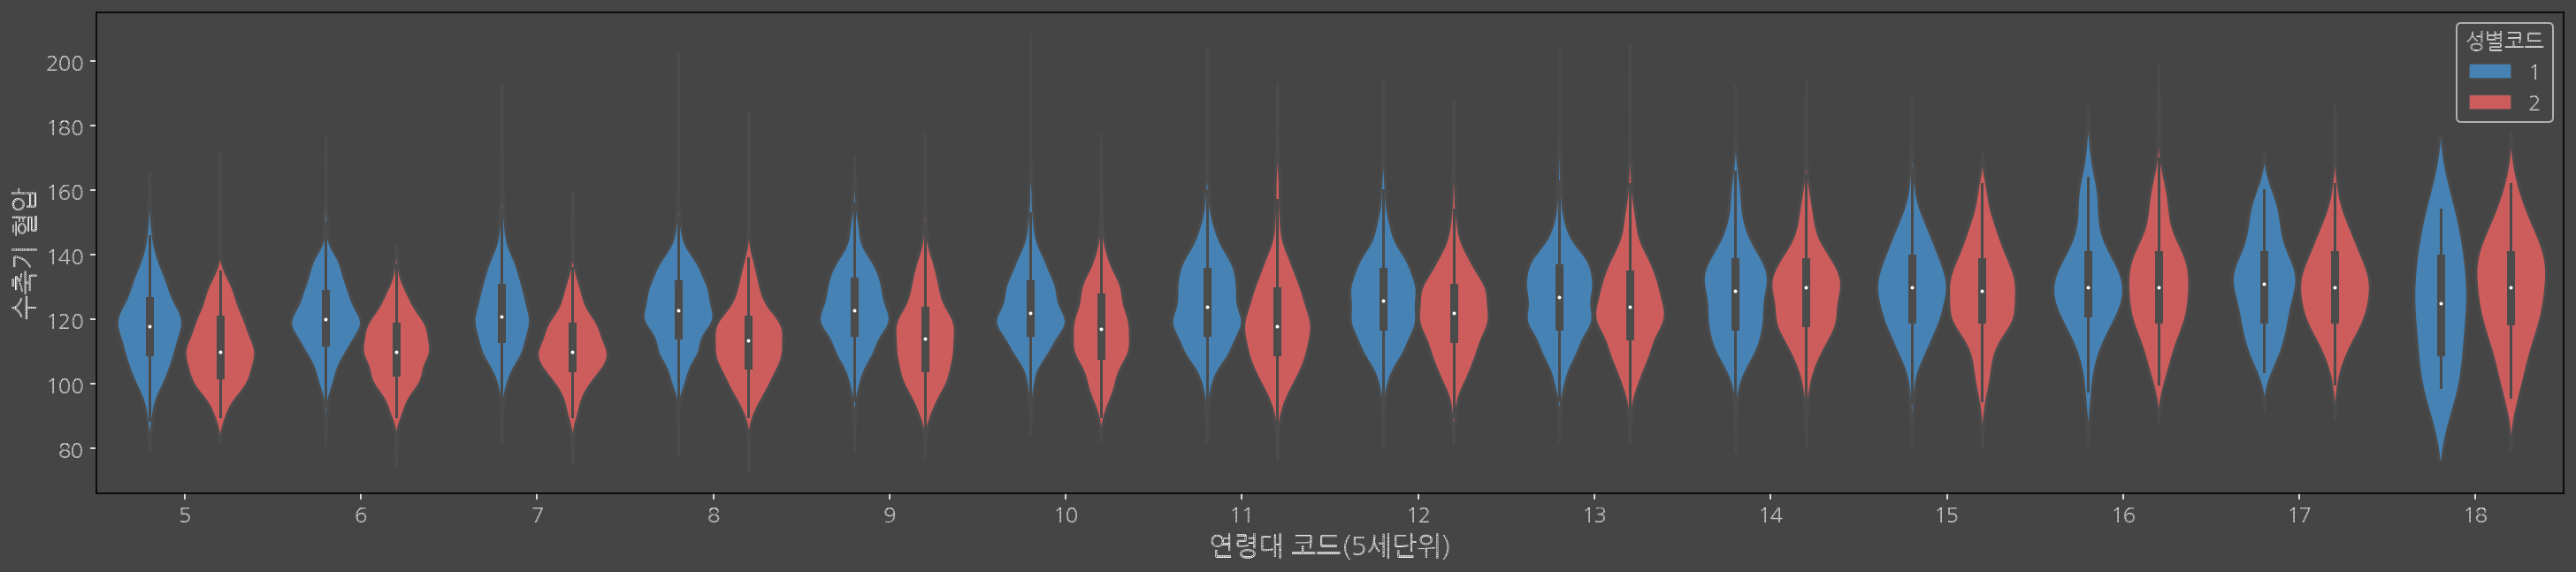

In [28]:
fig = plt.figure(figsize=(25,5))
sns.violinplot(data=data, x='연령대 코드(5세단위)', y='수축기 혈압', palette=pal_sex, saturation=1, hue='성별코드')
plt.show()

## split=True

This will merge the two hue categories and express in one.

ONLY WORKS WHEN hue is set for a binary category.

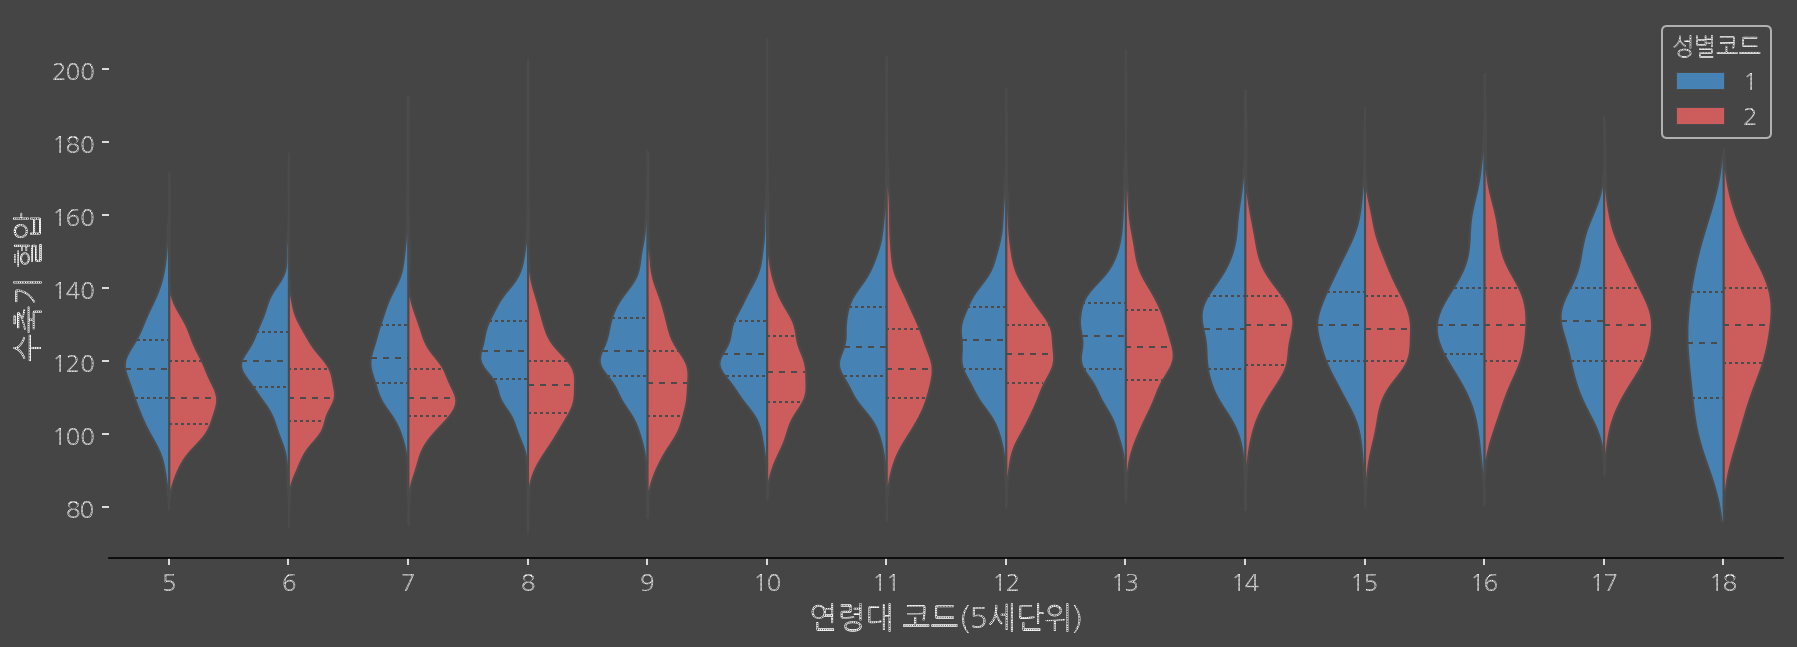

In [29]:
fig = plt.figure(figsize=(15,5))
sns.violinplot(data=data, x='연령대 코드(5세단위)', y='수축기 혈압', palette=pal_sex, saturation=1, hue='성별코드',\
               split=True, inner='quartile', linewidth=1, scale_hue=True, alpha=1)
sns.despine(left=True)
plt.show()

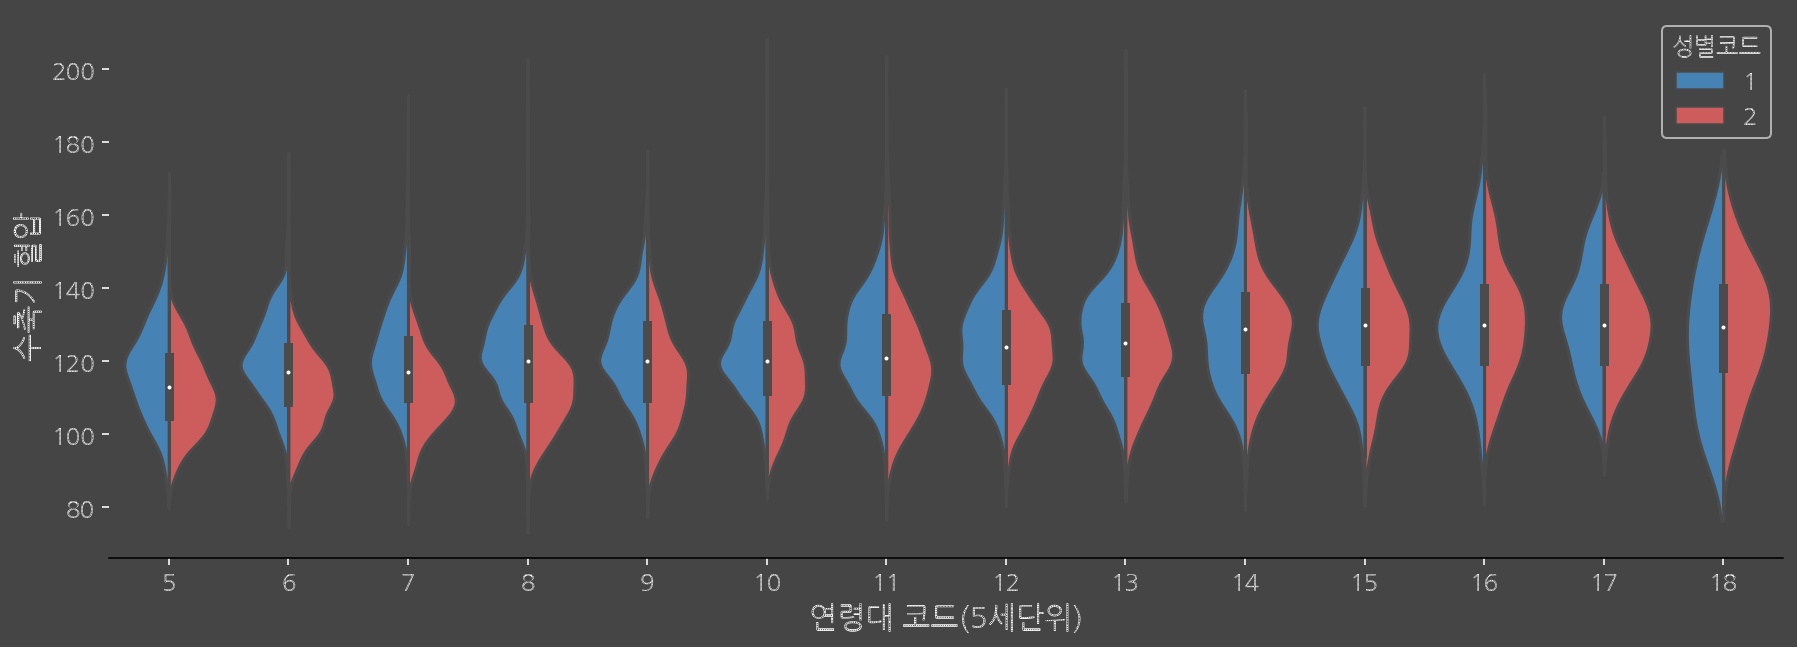

In [30]:
fig = plt.figure(figsize=(15,5))
sns.violinplot(data=data, x='연령대 코드(5세단위)', y='수축기 혈압', palette=pal_sex, saturation=1, hue='성별코드',\
               split=True, inner='box', dodge=False, alpha=1)
sns.despine(left=True)
plt.show()

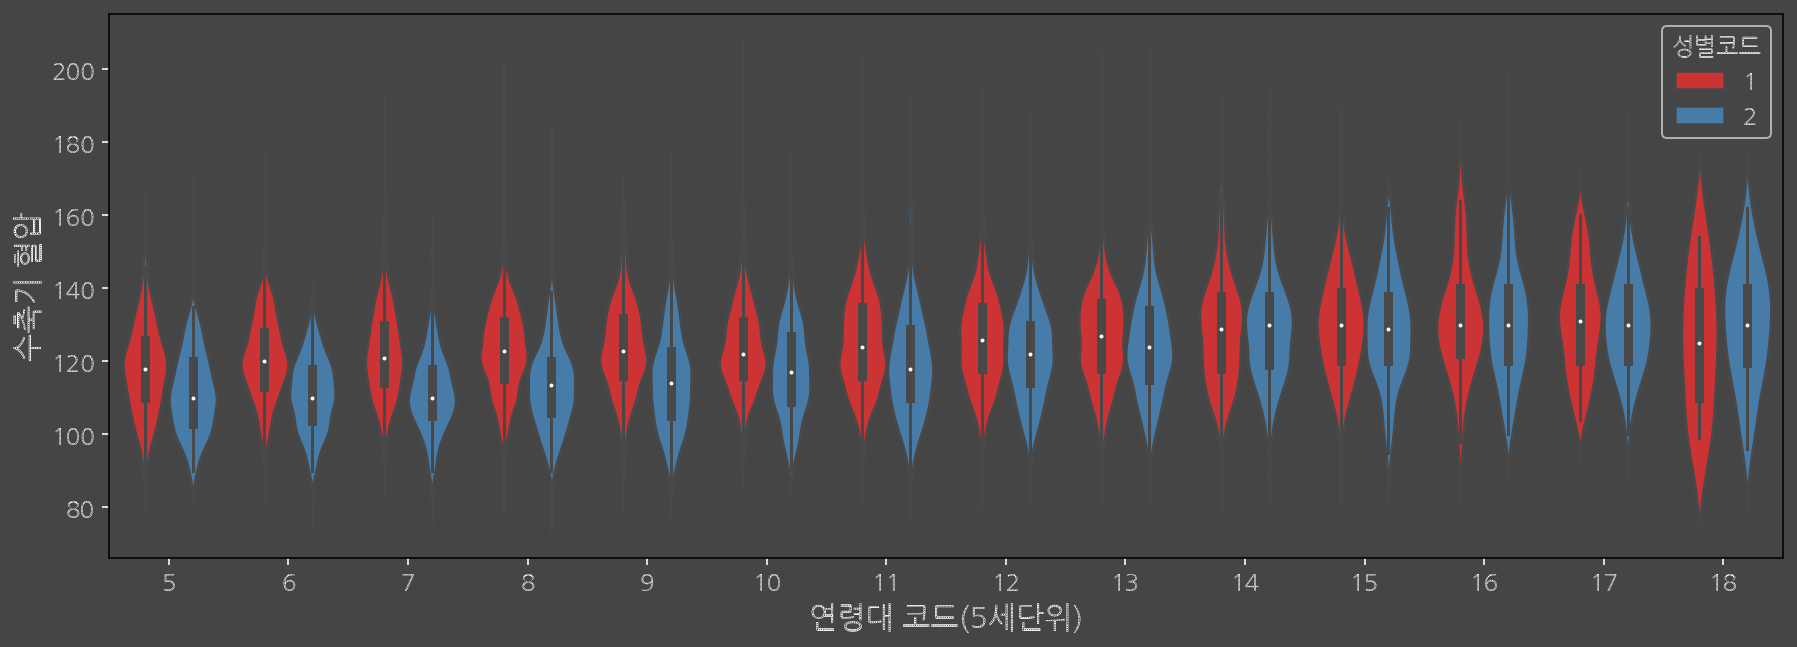

In [31]:
fig = plt.figure(figsize=(15,5))
sns.violinplot(data=data, x='연령대 코드(5세단위)', y='수축기 혈압', palette='Set1', hue='성별코드', alpha=1)
plt.show()

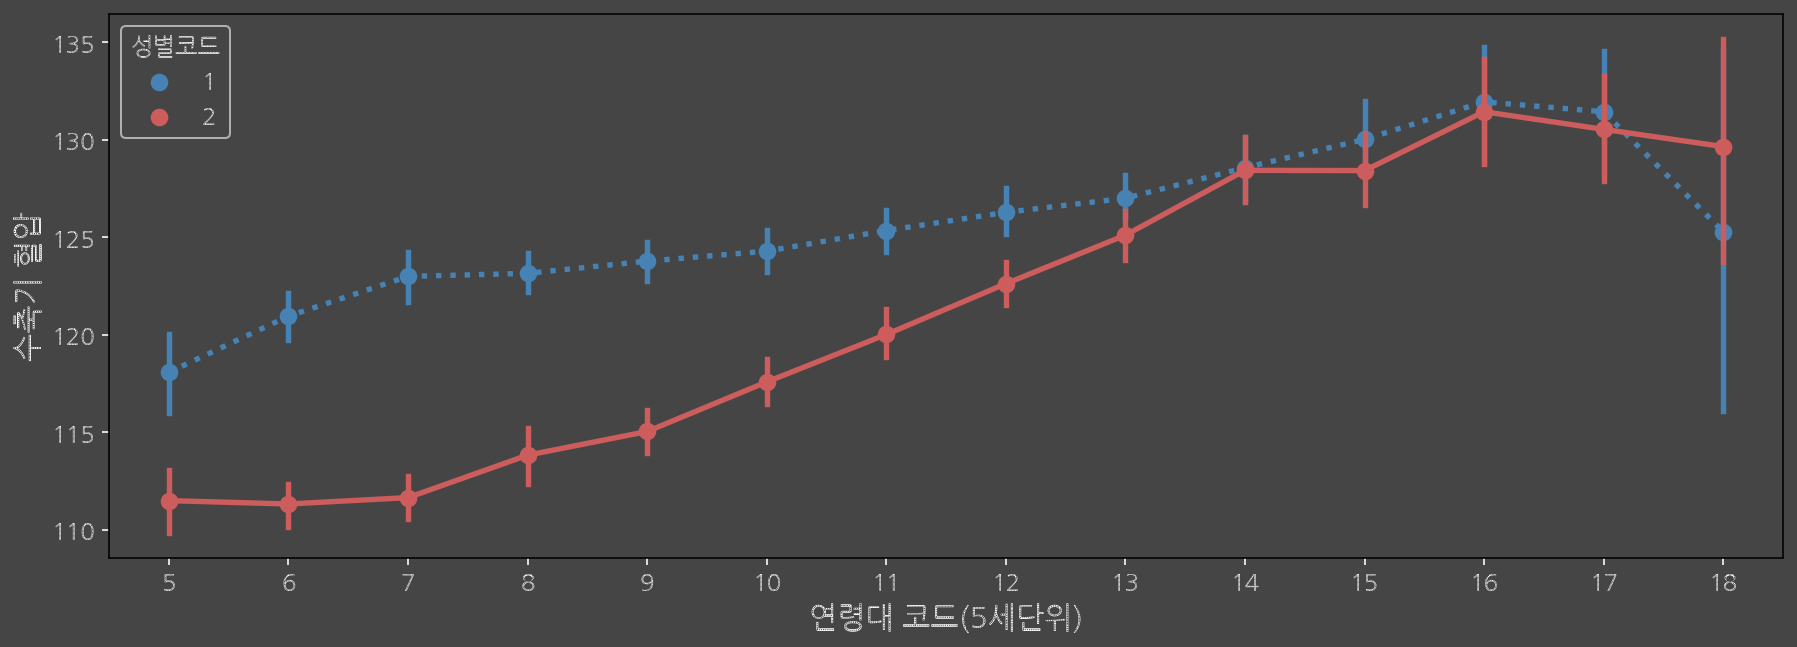

In [32]:
fig = plt.figure(figsize=(15,5))
sns.pointplot(data=data, x='연령대 코드(5세단위)', y='수축기 혈압', palette=pal_sex, hue='성별코드', linestyles=[':','-'], alpha=1)
plt.show()

# sns.lineplot

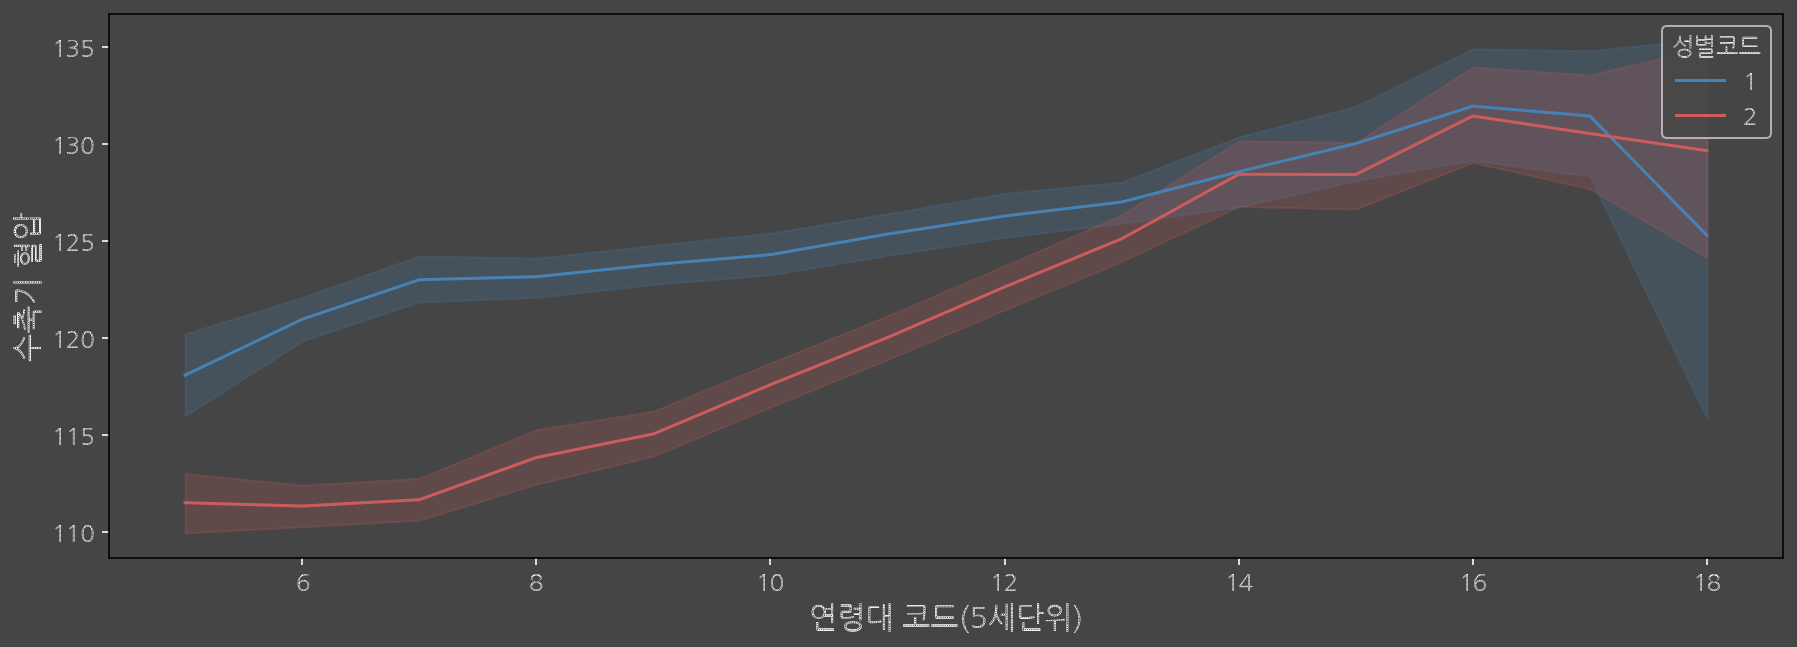

In [33]:
fig = plt.figure(figsize=(15,5))
sns.lineplot(data=data, x='연령대 코드(5세단위)', y='수축기 혈압', \
             palette=pal_sex, hue='성별코드', ci=95, alpha=1)
plt.show()

# sns.scatterplot

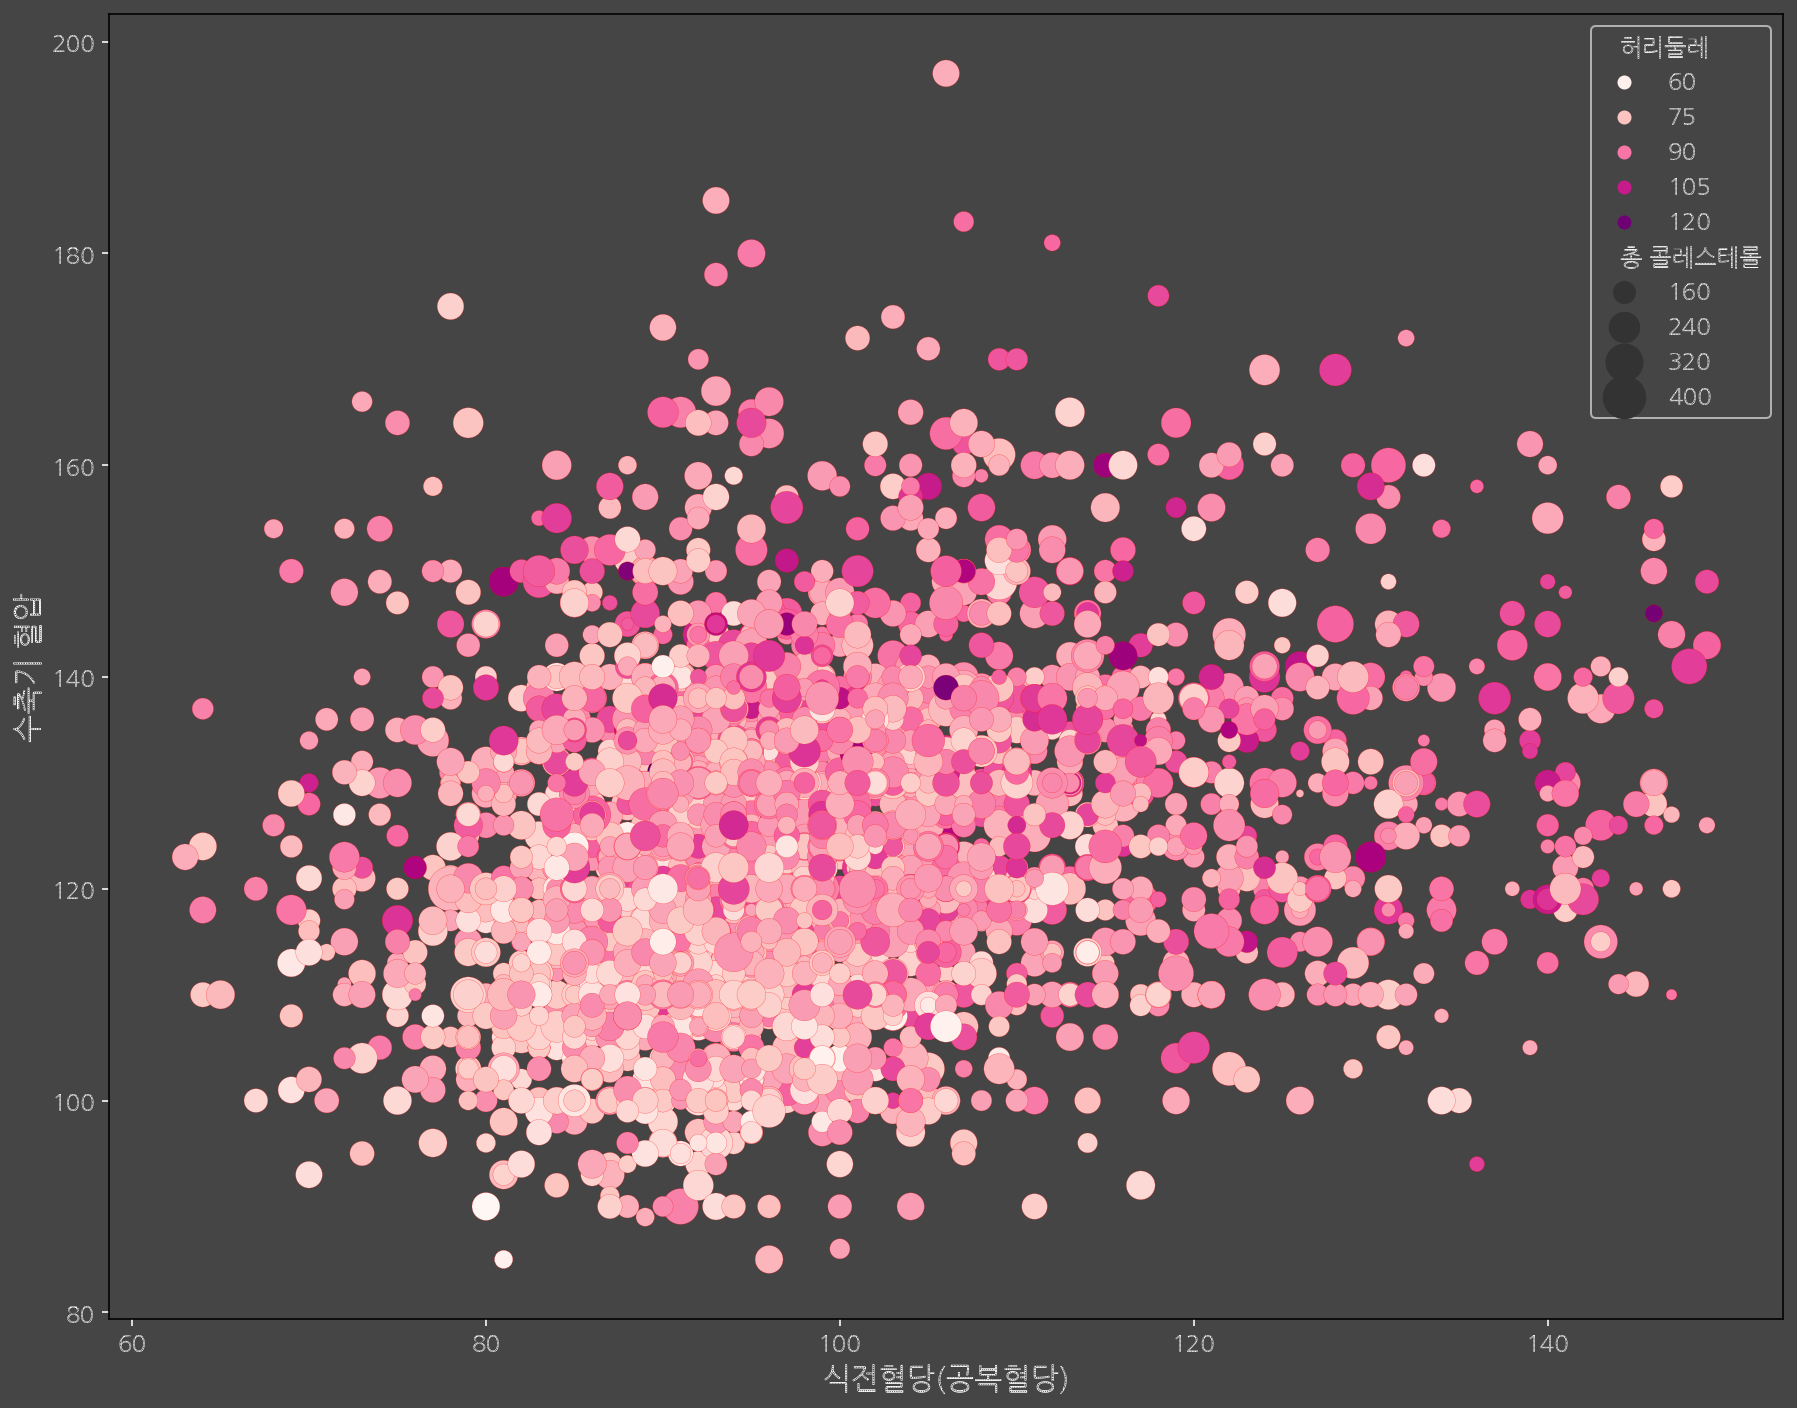

In [34]:
fig = plt.figure(figsize=(15,12))
target = data[(data['식전혈당(공복혈당)']<150) & (data["총 콜레스테롤"]<1000)]
sns.scatterplot(data=target, x='식전혈당(공복혈당)', y='수축기 혈압', hue='허리둘레', size="총 콜레스테롤"\
                , sizes=(15,500), palette='RdPu', alpha=1, linewidth=0.1, edgecolor='red')
plt.show()

# Matplotlib.pyplot

## matplotlib color map
As Seaborn's palette, matplotlib has its own color map that predefined set of colors that helps users to bring visibility and aesthetics to the plot. I've picked up this neat feature [here](https://frhyme.github.io/python-lib/matplotlib_extracting_color_from_cmap/).

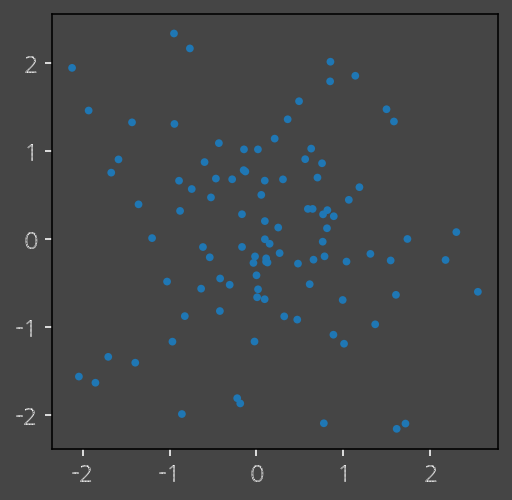

In [35]:
X = np.random.normal(0, 1, 100)
Y = np.random.normal(0, 1, 100)
C = np.random.randint(0, 5, 100)

figsize = (4,4)
title_fontsize = 20
label_fontsize = 15
dotsize = 15

fig = plt.figure(figsize = figsize)
plt.scatter(X,Y, s = dotsize)
plt.show()

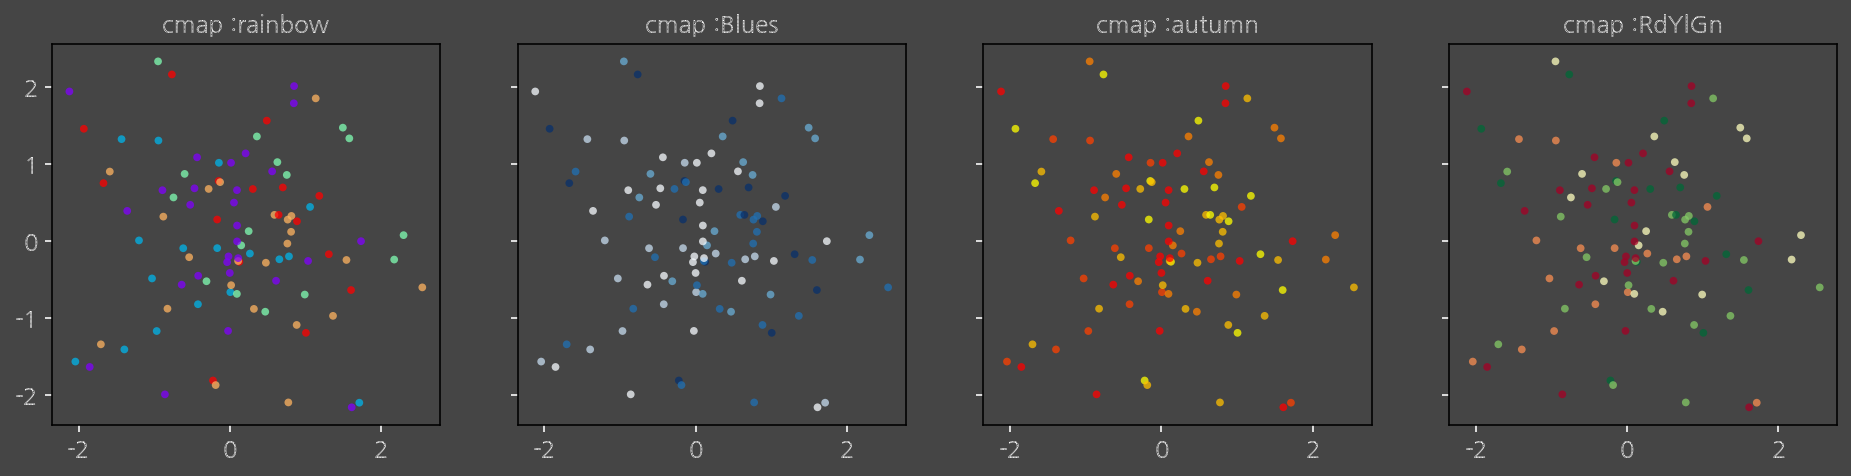

In [36]:
cmap_lst = [plt.cm.rainbow, plt.cm.Blues, plt.cm.autumn, plt.cm.RdYlGn]

f, axes = plt.subplots(1, 4, sharex=True, sharey=True)
f.set_size_inches((16,3.5))
for i in range(0,4):
    axes[i].scatter(X, Y, c = C, cmap = cmap_lst[i], s = dotsize, alpha = 0.75)
    axes[i].set_title('cmap :' + cmap_lst[i].name)
plt.show()

## show the value by color or dotsize

Set the value into color c (or dotsize s), plug in the color map.

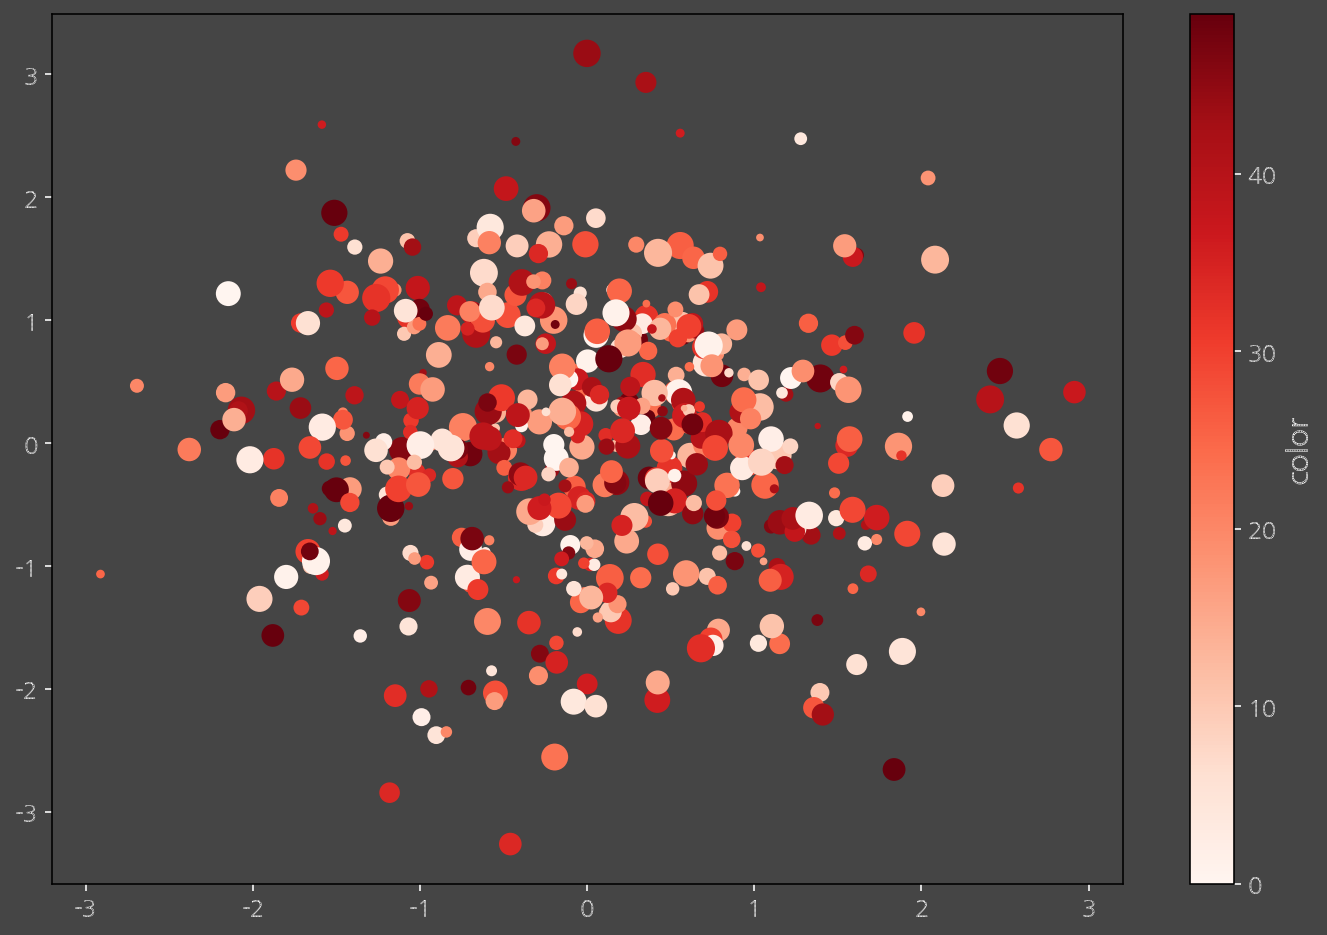

In [37]:
sample_size = 500
color_num = 50

X = np.random.normal(0, 1, sample_size)
Y = np.random.normal(0, 1, sample_size)

# We could use both integer values and float values for the color and size
C = np.random.randint(0, color_num, sample_size) # picking sample_size of random numbers in between 0 and color_num.
S = np.random.randint(10, 200, sample_size)

plt.figure(figsize=(12, 8))
plt.scatter(X, Y, c=C, s=S, cmap=plt.cm.Reds, alpha=1)
plt.colorbar(label='color')
plt.show()

## Show the category by color

Choose select number of colors from the color map, and plug that in into the cmap.

cmap = plt.cm.get_cmap('rainbow', color_num)

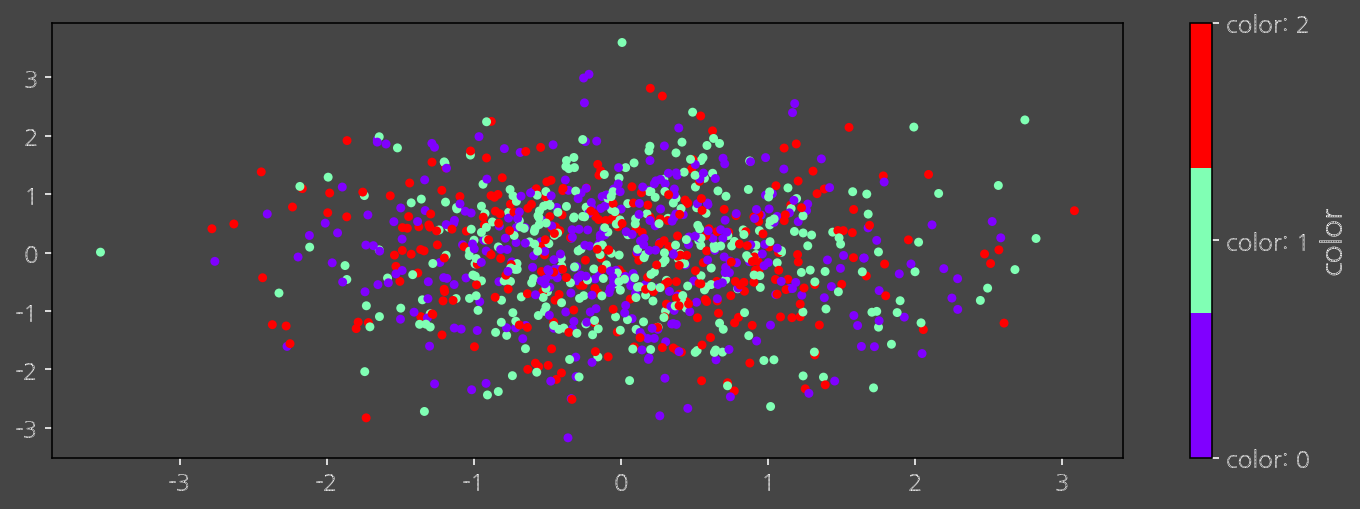

In [38]:
sample_size = 1000
color_num = 3

X = np.random.normal(0, 1, sample_size)
Y = np.random.normal(0, 1, sample_size)

C = np.random.randint(0, color_num, sample_size)

plt.figure(figsize=(12, 4))
plt.scatter(X, Y, c=C, s=20, cmap=plt.cm.get_cmap('rainbow', color_num), alpha=1)
plt.colorbar(ticks=range(color_num), format='color: %d', label='color')
plt.show()

## Show category by Legend

Plot each category seperately, assign each of them label, and show legend.

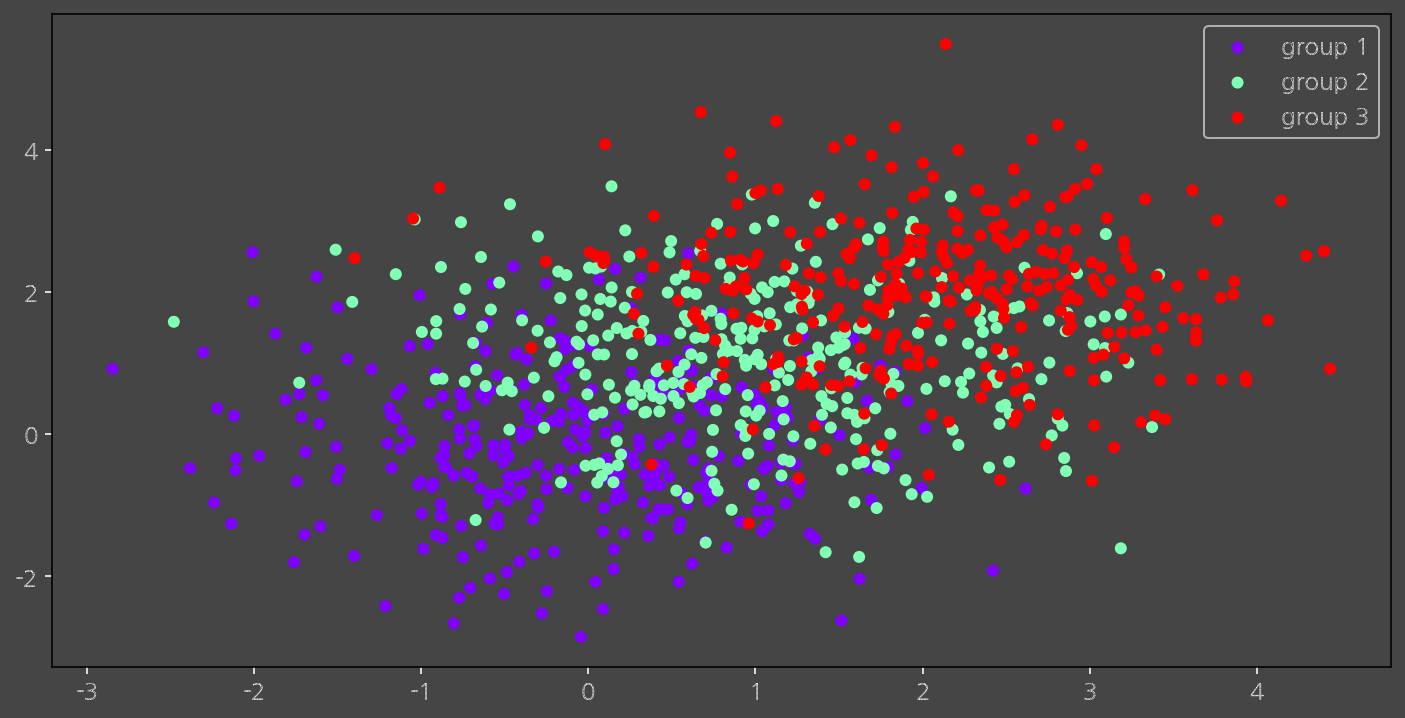

In [39]:
sample_size = 1000
color_num = 3

plt.figure(figsize = (12,6))
X = np.vstack([np.random.normal(i, 1, sample_size // color_num) for i in range(color_num)])
Y = np.vstack([np.random.normal(i, 1, sample_size // color_num) for i in range(color_num)])

# c_list = [plt.cm.rainbow(a) for a in np.linspace(0.0, 1.0, 3)]
## 'c' argument looks like a single numeric RGB or RGBA sequence,
## which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'. 
## Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.

c_list = [[plt.cm.rainbow(a)] for a in np.linspace(0.0, 1.0, color_num)] # Using 2-D array with a single row to avoid alert.

for i in range(3):
    plt.scatter(X[i], Y[i], c = c_list[i], label = 'group {}'.format(int(i+1)), alpha = 1)
plt.legend()
plt.show()

#Other examples
https://seaborn.pydata.org/examples/grouped_violinplots.html

# Advanced PLT stuff
Let's draw the following FiveThirtyEight graph. I don't know which fonts they've used here, so I'll just stick with the base font and apply *italic* and **bold**.

![image](https://fivethirtyeight.com/wp-content/uploads/2019/10/Mehta-Media1028-1028-1.png)

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

cable_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/cable_weekly.csv'
online_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/online_weekly.csv'

cable = pd.read_csv(cable_news_url)
online = pd.read_csv(online_news_url)

merged = pd.merge(cable[['date', 'name', 'pct_of_all_candidate_clips']], online[['date', 'name', 'pct_of_all_candidate_stories']])
merged['date'] = pd.to_datetime(merged['date'], infer_datetime_format=True)
merged = merged.set_index('date')

unique_dates = list(set(merged.index.to_list()))

import datetime

joe_biden_cable_multiple = []
joe_biden_online_multiple = []

for date in unique_dates:
  #that_day = merged.loc[datetime.date(year=date.year, month=date.month, day=date.day)]
  str_date = str(date.year)+"-"+str(date.month) + "-" + str(date.day)
  that_day = merged.loc[str_date]

  joe_biden_cable_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_clips']
  not_joe_biden_cable_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_clips'].max()
  joe_biden_cable_multiple_of_max = joe_biden_cable_that_day / not_joe_biden_cable_max

  joe_biden_online_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_stories']
  not_joe_biden_online_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_stories'].max()
  joe_biden_online_multiple_of_max = joe_biden_online_that_day / not_joe_biden_online_max


  joe_biden_cable_multiple.append(joe_biden_cable_multiple_of_max.values[0])
  joe_biden_online_multiple.append(joe_biden_online_multiple_of_max.values[0])

df = pd.DataFrame({'date': unique_dates, 'biden_cable_multiple':joe_biden_cable_multiple, 'biden_online_multiple': joe_biden_online_multiple})
df = df.set_index('date')
df = df.sort_index()

data_for_graph = df.loc[datetime.date(2019, 4, 15):]
print(data_for_graph.shape)
data_for_graph.head()

(27, 2)


,biden_cable_multiple,biden_online_multiple
date,,
2019-04-21,3.087352,1.107492
2019-04-28,3.707641,1.295820
2019-05-05,2.805169,1.306122
2019-05-12,3.235849,1.045386
2019-05-19,2.494624,1.119588


In [41]:
melted = pd.melt(data_for_graph, ignore_index=False)
melted["variable"].unique()

array(['biden_cable_multiple', 'biden_online_multiple'], dtype=object)

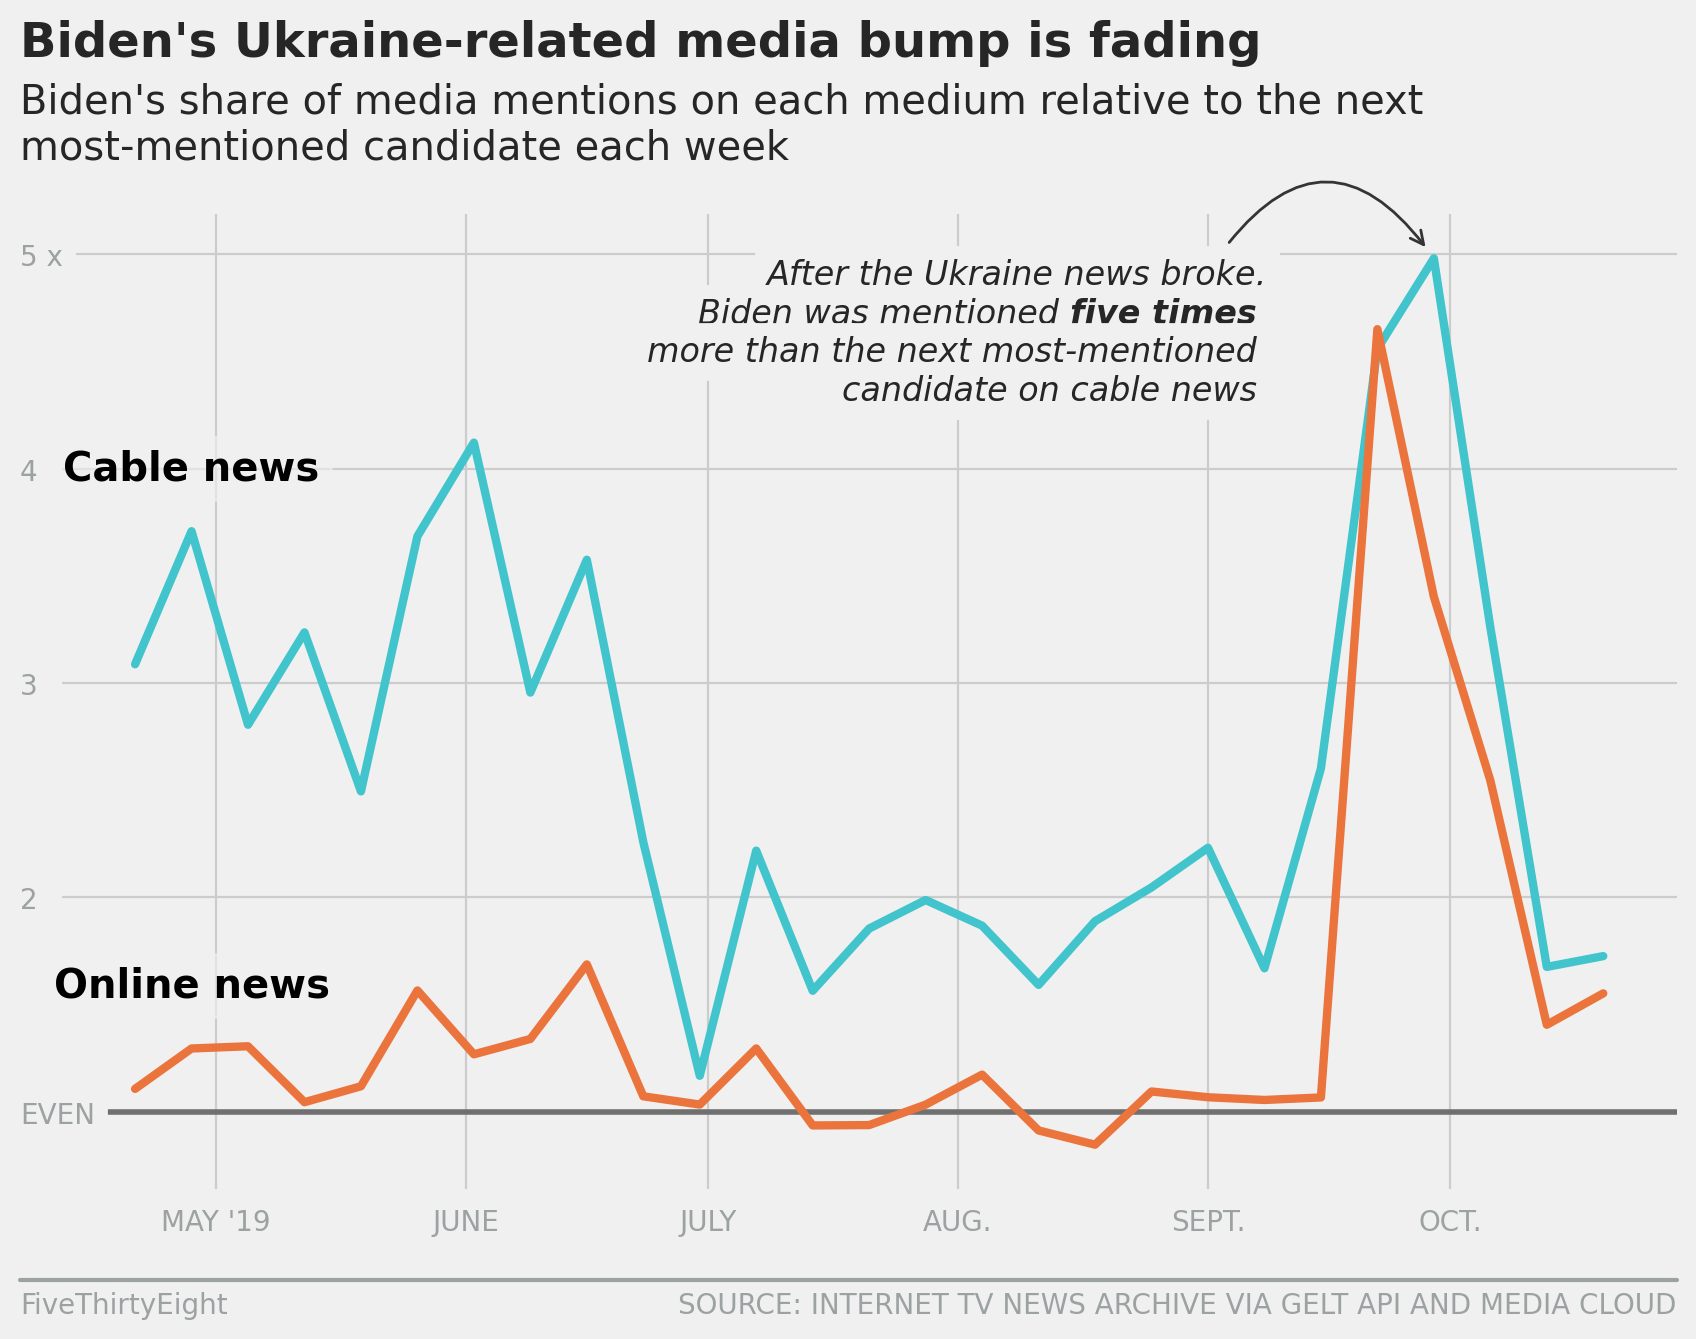

In [42]:
import matplotlib.dates as mdates
import matplotlib.transforms as transforms
import matplotlib.lines as lines

# This graph was drawn from default rcParams setting, so I'll revert all settings to default.
mpl.rcParams.update(mpl.rcParamsDefault)

# Set color and fontsize parameters
# matplotlib.text.text has predefined set of text sizes relative to the rcParam font.size 
# These predefined text size can be accessed by using one of the followings:
# ['xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large', 'larger', 'smaller']
mpl.rcParams['font.size'] = 10
COLOR_TICK = "#9ca1a2"
COLOR_EVENLINE = "#707070"
COLOR_FACECOLOR = "#f0f0f0"
COLOR_ARROW = "#343434"

## To have partially italian text in plot, we need to use LaTex. 
## However, we do not need to use usetex = True, which have heavy dependency problems. ## THIS DOESN'T WORK ATM.
TEXT_SUPTITLE = "Biden's Ukraine-related media bump is fading"
TEXT_SECONDTITLE = "Biden's share of media mentions on each medium relative to the next\nmost-mentioned candidate each week"
# Notice that the sequence of the text is different from what you read.
# This is for the ease of positioning annotations.
TEXT_ANNOTATIONS = ["After the Ukraine news broke,", "five times", "more than the next most-mentioned", "candidate on cable news", "Biden was mentioned"]
TEXT_BTMLEFT = "FiveThirtyEight"
TEXT_BTMRIGHT = "source: internet tv news archive via gelt api and media cloud".upper()
pal = {"biden_cable_multiple" : "#41c4cc", "biden_online_multiple" : "#eb743c"}

with sns.axes_style("whitegrid"):
    # Base figure and ax build
    fig = plt.figure(figsize=(8.5,6.5))
    
    # Each figure and ax has xy coordinate system ranging from (0,0) to (1,1).
    # Let's define ax area and derive a ax-figure coordinate conversion.
    # We can get the ax boundary by calling ax.get_position()
    # This comes handy when we don't define the ax area. 
    ax_margin = 0.05
    ax = fig.add_axes([0+ax_margin,0.05+ax_margin,1-ax_margin,0.8-ax_margin])
    
    fig_to_ax = transforms.blended_transform_factory(fig.transFigure, ax.transAxes) # when ax taking inputs as fig coords
    ax_to_fig = transforms.blended_transform_factory(ax.transAxes, fig.transFigure)

    sns.lineplot(data=melted, x=melted.index, y="value", hue='variable', palette=pal, linewidth=3, ax=ax)
        
    # Visibility of the legend. Removing legend value could also work in this case.
    ax.legend().set_visible(False)

    # Set facecolor
    fig.set_facecolor(COLOR_FACECOLOR)
    ax.set_facecolor(COLOR_FACECOLOR)

    ######################################################################################
    # Axis manipulation
    # Set x axis tick base as abbreviated months.
    # https://matplotlib.org/3.3.4/gallery/ticks_and_spines/date_concise_formatter.html
    monthformatter = mdates.DateFormatter('%b')
    ax.xaxis.set_major_formatter(monthformatter)

    # Change tick labels. Tick locations will remain the same.
    ax.set_xticklabels(["MAY '19", "JUNE", "JULY", "AUG.", "SEPT.", "OCT."], color=COLOR_TICK, size="medium")
    ax.set_yticklabels(["","EVEN", 2, 3, 4, "5 x"], ha="left", # horizontal alignment to the left
                       backgroundcolor=COLOR_FACECOLOR, color=COLOR_TICK, size="medium") 

    # Set ytick label direction
    ax.tick_params(axis='y', direction="in", pad=15)

    # Set visibility of axis labels to false. Similar to legend visibility, we could also remove label values.
    ax.xaxis.get_label().set_visible(False)
    ax.yaxis.get_label().set_visible(False)
    # ax.set(xlabel=None, ylabel=None)

    # Remove spines from ax. Spines are the lines surrounding the ax.
    for key in ax.spines.keys():
        ax.spines[key].set_visible(False)

    # Thickening line
    # Per oop API, we can select components of the ax by using get_ methods.
    evenline = ax.yaxis.get_gridlines()[1]
    evenline.set_linewidth(2)
    evenline.set_color(COLOR_EVENLINE)
    evenline.set_clip_on(True)

    # Annotations to each line.
    for line, news_type in zip(ax.lines, ["Cable news", "Online news"]):
        # get x and y data values to use them as xy coordinate values.
        y = line.get_ydata()
        x = line.get_xdata()
        ax.annotate(news_type, xy=(x[1],y[1]+0.2), xycoords=('data', 'data'), 
                        ha='center', va='bottom', color="black", size="x-large", fontweight="bold", fontstretch='condensed',
                        # https://stackoverflow.com/questions/56316590/change-font-width-in-matplotlib guesses fontstretch is not yet implemented. not sure
                        ).set_bbox(dict(facecolor=COLOR_FACECOLOR, alpha=0.6, edgecolor="#f0f0f0"))

    cable_news_line = ax.lines[0]
    y = cable_news_line.get_ydata()
    x = cable_news_line.get_xdata()

    annotations = [None for _ in range(5)]
    annotations[0] = ax.annotate(TEXT_ANNOTATIONS[0], fontstyle='italic',
            xy=(x[-4], y[-4]), xycoords='data',
            xytext=(-60,0), textcoords='offset points',
            size="large", va="top", ha="right", backgroundcolor=COLOR_FACECOLOR,
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.7",color=COLOR_ARROW, relpos=(0.9,1), linewidth=1, shrinkB=5)
            )
    # .get_position())
    annotations[1] = ax.annotate(TEXT_ANNOTATIONS[1], fontstyle='italic', fontweight='bold',
                                 xy=(1,0), xycoords=annotations[0],
                                 xytext=(-60,-2), textcoords='offset points',
                                 size="large", va="top", ha="right", backgroundcolor=COLOR_FACECOLOR,)
    
    annotations[4] = ax.annotate(TEXT_ANNOTATIONS[4], fontstyle='italic', 
                                 xy=(0,0), xycoords=annotations[1],
                                 xytext=(-4,0), textcoords='offset points',
                                 size="large", va="bottom", ha="right", backgroundcolor=COLOR_FACECOLOR)
    
    for i in range(2,4):
        annotations[i] = ax.annotate(TEXT_ANNOTATIONS[i], fontstyle='italic', 
                                     xy=(1,0), xycoords=annotations[i-1],
                                     xytext=(0,-2), textcoords='offset points',
                                     size="large", va="top", ha="right", backgroundcolor=COLOR_FACECOLOR,)
    
    # there are many ways to get ax boundaries.
    ax_bbox = fig.get_axes()[0].get_position()

    ##### Set titles.
    # Above graph has one bold title and one normal title.
    # So I used two separate titles: fig.suptitle and ax.set_title.
    # This brought another problem: Finding the relative coordinate of ax.title on figure.
    # Also, the starting position of titles needed to be determined by the left end position of ax yticklabels.
    # To get the left end point of yticklabels, we need to get the display pixel level of position
    # and transform it into either fig coord or ax coord. I chose the later.
    # Transform from display pixel value to ax coord value(0.0 ~ 1.0)
    inv_to_ax = ax.transAxes.inverted()
        
    # get_tightbbox generates outer boundary of the Axes.
    # take x0.
    tick_leftend_display = ax.get_tightbbox(fig.canvas.get_renderer()).x0
    tick_left_ax_coord = inv_to_ax.transform((tick_leftend_display,0))[0]
    ax_title = ax.set_title(TEXT_SECONDTITLE,
                fontsize="x-large", ha="left", loc="left", x=tick_left_ax_coord, pad=20)
    pos_ax_title = ax_title.get_position()
    suptitle = fig.suptitle(TEXT_SUPTITLE, fontsize="xx-large", fontweight='bold', ha="left", va="top",
                            x=pos_ax_title[0], y=pos_ax_title[1], transform=ax_to_fig)
    

    ##### Set copy and source notation on the bottom
    # tak position of 
    btm_text = fig.text(s=TEXT_BTMLEFT, x=pos_ax_title[0], y=0,transform=ax_to_fig,va="bottom",ha="left",c=COLOR_TICK, size="medium")
    fig.text(s=TEXT_BTMRIGHT, x=ax_bbox.x1, y=0, va="bottom",ha="right",c=COLOR_TICK, size="medium")


    # I didn't know what the btm_line y value on ax coord would be
    # so I had to use fig coord of tick_left.
    inv_to_fig = fig.transFigure.inverted()
    tick_left_fig_coord = inv_to_fig.transform((tick_leftend_display, 0))[0]
    btm_line = fig.add_artist(lines.Line2D([tick_left_fig_coord, 1], [0.03, 0.03]))
    btm_line.set_color(COLOR_TICK)

    plt.show()